# Voxel debugging

This is a notebook to work on debugging the voxel properties. Here you can check the absorption, emissivity, and intensity of the voxel, as well as perform gaussian fits to these properties. This is to help ensure everything works as expected (the emissivity and absorption should have the same gaussian line width).

In [1]:
from kosmatau3d import models
import numpy as np
from time import time
import matplotlib.pyplot as plt

## Misc. tests

31.676347970962524
31.6766197681427 


Volume Filling Factor
---------------------
Clump 1: 4.047

Density
---------------------
Clump 1: 6.310e+04



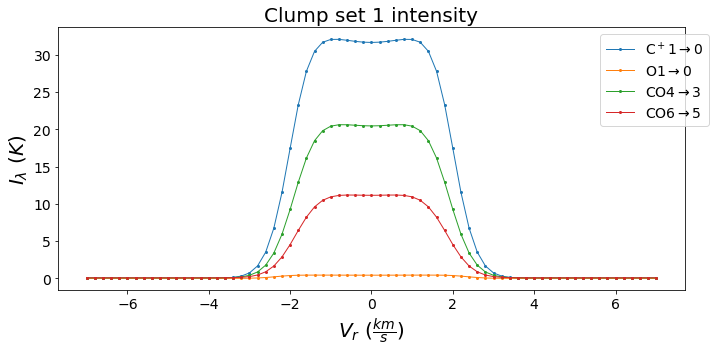

In [11]:
%matplotlib inline

inGrid = True
test_calc = True
test_pexp = True
test_opacity = False

models.constants.dtype = np.float32

# Use these to change the voxel properties, which is necessary in the default mode.
parameters = {
                # Model parameters#25.0/3600.0/180.0*np.pi*870.,
                'voxel_size' : 0.1,
                 'molecules' : 'all',
#                  'molecules' : ['C+ 1', 'C 1', 'CO 1'],
                      'dust' : 'PAH',
#                       'dust' : 'molecular',
            'clumpMassRange' : [[0, -3]],
           'clumpMassNumber' : [4],
                 'clumpNmax' : [None],
             'velocityRange' : [-7, 7],
            'velocityNumber' : 71,

                # Voxel properties
                  'velocity' : 0,
        'ensembleDispersion' : 1,
              'ensembleMass' : 10**0.8,
#               'volumeFactor' : [0.8, 0.2],
           'ensembleDensity' : 10**4.8,
                       'FUV' : 10**1.7,
                      # 'crir' : 2e-16,
    
                # logging
                   'verbose' : True,
                     'timed' : False,
                     'debug' : False
          }

if inGrid:
    models.constants.voxel_size = parameters['voxel_size']
#     models.constants.changeMassFunctionParameters(alpha=parameters['alpha'], gamma=parameters['gamma'])
    models.constants.changeVelocityRange(parameters['velocityRange'])
    models.constants.changeVelocityNumber(parameters['velocityNumber'])
    models.constants.addClumps(massRange=parameters['clumpMassRange'], num=parameters['clumpMassNumber'], Nmax=parameters['clumpNmax'], reset=True)
    models.constants.changeDustWavelengths(parameters['dust'])
    models.observations.methods.initialise()
    models.species.addMolecules(parameters['molecules'])
    models.interpolations.initialise()
    models.constants.dtype = np.float64

t0 = time()
    
# for p in prop:
for _ in range(1):
    t1 = time()
    vox = models.Voxel()
    vox.setProperties(**parameters, fromGrid=inGrid)
    vox.calculateEmission(test_calc=test_calc, test_opacity=test_opacity, test_pexp=test_pexp, verbose=False, timed=False)
    print(time()-t1)

print(time()-t0, '\n')
print('\nVolume Filling Factor')
print('---------------------')
print('\n'.join(['Clump {}: {:.3f}'.format(_+1, vox.getVolumeFillingFactor()[_]) for _ in range(models.constants.ensembles)]))
print('\nDensity')
print('---------------------')
print('\n'.join(['Clump {}: {:.3e}'.format(_+1, vox.getDensity()[_]) for _ in range(models.constants.ensembles)]))
print()
# vox.plotMolecule(quantity='intensity', molecule=['C+ 1', 'C 1', 'CO 1'], moleculeName=[r'$\mathrm{C}^+ 1 \rightarrow 0$', r'$\mathrm{C} 1 \rightarrow 0$', r'$\mathrm{CO} 1 \rightarrow 0$'], title='Dense voxel')
vox.plotMolecule(quantity='intensity', molecule=['C+ 1', 'O 1', 'CO 4', 'CO 6'], moleculeName=[r'$\mathrm{C}^+ 1 \rightarrow 0$', r'$\mathrm{O} 1 \rightarrow 0$', r'$\mathrm{CO} 4 \rightarrow 3$', r'$\mathrm{CO} 6 \rightarrow 5$'])
# plt.show()

65.66067171096802
65.66104745864868 


Volume Filling Factor
---------------------
Clump 1: 5.457

Density
---------------------
Clump 1: 3.162e+04



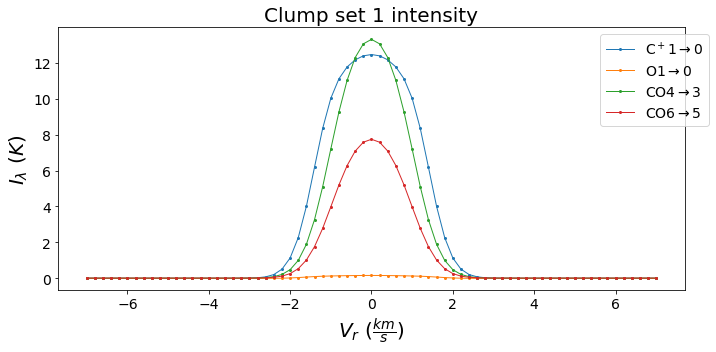

In [23]:
%matplotlib inline

inGrid = True

models.constants.dtype = np.float32

# Use these to change the voxel properties, which is necessary in the default mode.
parameters = {
                # Model parameters#
                'voxel_size' : 25.0/3600.0/180.0*np.pi*870.,#0.1,
                 'molecules' : 'all',
#                  'molecules' : ['C+ 1', 'C 1', 'CO 1'],
                      'dust' : 'PAH',
#                       'dust' : 'molecular',
            'clumpMassRange' : [[0, -3]],
           'clumpMassNumber' : [4],
                 'clumpNmax' : [None],
             'velocityRange' : [-7, 7],
            'velocityNumber' : 71,

                # Voxel properties
                  'velocity' : 0,
        'ensembleDispersion' : 1,
              'ensembleMass' : 5,
#               'volumeFactor' : [0.8, 0.2],
           'ensembleDensity' : 10**4.5,
                       'FUV' : 10**1.8,
                      # 'crir' : 2e-16,
    
                # logging
                   'verbose' : True,
                     'timed' : False,
                     'debug' : False
          }

if inGrid:
    models.constants.voxel_size = parameters['voxel_size']
#     models.constants.changeMassFunctionParameters(alpha=parameters['alpha'], gamma=parameters['gamma'])
    models.constants.changeVelocityRange(parameters['velocityRange'])
    models.constants.changeVelocityNumber(parameters['velocityNumber'])
    models.constants.addClumps(massRange=parameters['clumpMassRange'], num=parameters['clumpMassNumber'], Nmax=parameters['clumpNmax'], reset=True)
    models.constants.changeDustWavelengths(parameters['dust'])
    models.observations.methods.initialise()
    models.species.addMolecules(parameters['molecules'])
    models.interpolations.initialise()
    models.constants.dtype = np.float64

t0 = time()
    
# for p in prop:
for _ in range(1):
    t1 = time()
    vox = models.Voxel()
    vox.setProperties(**parameters, fromGrid=inGrid)
    vox.calculateEmission(test_calc=False, verbose=False, timed=False)
    print(time()-t1)

print(time()-t0, '\n')
print('\nVolume Filling Factor')
print('---------------------')
print('\n'.join(['Clump {}: {:.3f}'.format(_+1, vox.getVolumeFillingFactor()[_]) for _ in range(models.constants.ensembles)]))
print('\nDensity')
print('---------------------')
print('\n'.join(['Clump {}: {:.3e}'.format(_+1, vox.getDensity()[_]) for _ in range(models.constants.ensembles)]))
print()
# vox.plotMolecule(quantity='intensity', molecule=['C+ 1', 'C 1', 'CO 1'], moleculeName=[r'$\mathrm{C}^+ 1 \rightarrow 0$', r'$\mathrm{C} 1 \rightarrow 0$', r'$\mathrm{CO} 1 \rightarrow 0$'], title='Dense voxel')
vox.plotMolecule(quantity='intensity', molecule=['C+ 1', 'O 1', 'CO 4', 'CO 6'], moleculeName=[r'$\mathrm{C}^+ 1 \rightarrow 0$', r'$\mathrm{O} 1 \rightarrow 0$', r'$\mathrm{CO} 4 \rightarrow 3$', r'$\mathrm{CO} 6 \rightarrow 5$'])
# plt.show()

61.63955044746399
61.6398663520813 


Volume Filling Factor
---------------------
Clump 1: 5.457

Density
---------------------
Clump 1: 3.162e+04



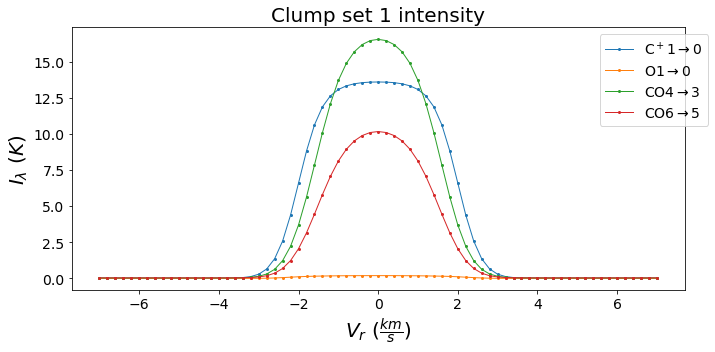

In [25]:
%matplotlib inline

inGrid = True

models.constants.dtype = np.float32

# Use these to change the voxel properties, which is necessary in the default mode.
parameters = {
                # Model parameters#
                'voxel_size' : 25.0/3600.0/180.0*np.pi*870.,#0.1,
                 'molecules' : 'all',
#                  'molecules' : ['C+ 1', 'C 1', 'CO 1'],
                      'dust' : 'PAH',
#                       'dust' : 'molecular',
            'clumpMassRange' : [[0, -3]],
           'clumpMassNumber' : [4],
                 'clumpNmax' : [1],
             'velocityRange' : [-7, 7],
            'velocityNumber' : 71,

                # Voxel properties
                  'velocity' : 0,
        'ensembleDispersion' : 1,
              'ensembleMass' : 5,
#               'volumeFactor' : [0.8, 0.2],
           'ensembleDensity' : 10**4.5,
                       'FUV' : 10**1.8,
                      # 'crir' : 2e-16,
    
                # logging
                   'verbose' : True,
                     'timed' : False,
                     'debug' : False
          }

if inGrid:
    models.constants.voxel_size = parameters['voxel_size']
#     models.constants.changeMassFunctionParameters(alpha=parameters['alpha'], gamma=parameters['gamma'])
    models.constants.changeVelocityRange(parameters['velocityRange'])
    models.constants.changeVelocityNumber(parameters['velocityNumber'])
    models.constants.addClumps(massRange=parameters['clumpMassRange'], num=parameters['clumpMassNumber'], Nmax=parameters['clumpNmax'], reset=True)
    models.constants.changeDustWavelengths(parameters['dust'])
    models.observations.methods.initialise()
    models.species.addMolecules(parameters['molecules'])
    models.interpolations.initialise()
    models.constants.dtype = np.float64

t0 = time()
    
# for p in prop:
for _ in range(1):
    t1 = time()
    vox = models.Voxel()
    vox.setProperties(**parameters, fromGrid=inGrid)
    vox.calculateEmission(test_calc=False, verbose=False, timed=False)
    print(time()-t1)

print(time()-t0, '\n')
print('\nVolume Filling Factor')
print('---------------------')
print('\n'.join(['Clump {}: {:.3f}'.format(_+1, vox.getVolumeFillingFactor()[_]) for _ in range(models.constants.ensembles)]))
print('\nDensity')
print('---------------------')
print('\n'.join(['Clump {}: {:.3e}'.format(_+1, vox.getDensity()[_]) for _ in range(models.constants.ensembles)]))
print()
# vox.plotMolecule(quantity='intensity', molecule=['C+ 1', 'C 1', 'CO 1'], moleculeName=[r'$\mathrm{C}^+ 1 \rightarrow 0$', r'$\mathrm{C} 1 \rightarrow 0$', r'$\mathrm{CO} 1 \rightarrow 0$'], title='Dense voxel')
vox.plotMolecule(quantity='intensity', molecule=['C+ 1', 'O 1', 'CO 4', 'CO 6'], moleculeName=[r'$\mathrm{C}^+ 1 \rightarrow 0$', r'$\mathrm{O} 1 \rightarrow 0$', r'$\mathrm{CO} 4 \rightarrow 3$', r'$\mathrm{CO} 6 \rightarrow 5$'])
# plt.show()

31.62122631072998
31.62150526046753 


Volume Filling Factor
---------------------
Clump 1: 5.457

Density
---------------------
Clump 1: 3.162e+04



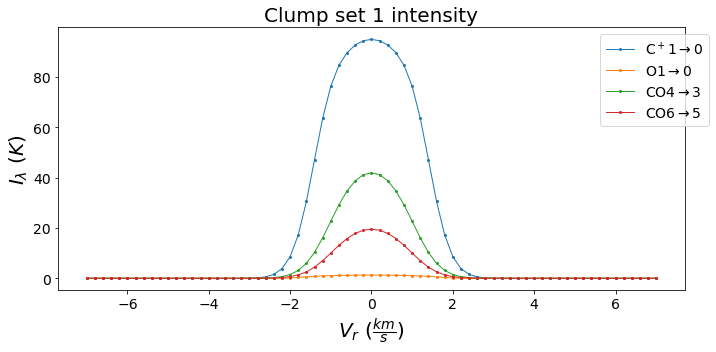

In [5]:
%matplotlib inline

inGrid = True
test_calc = True
test_opacity = False
test_pexp = False
test_fv = True

models.constants.dtype = np.float32

# Use these to change the voxel properties, which is necessary in the default mode.
parameters = {
                # Model parameters#
                'voxel_size' : 25.0/3600.0/180.0*np.pi*870.,#0.1,
                 'molecules' : 'all',
#                  'molecules' : ['C+ 1', 'C 1', 'CO 1'],
                      'dust' : 'PAH',
#                       'dust' : 'molecular',
            'clumpMassRange' : [[0, -3]],
           'clumpMassNumber' : [4],
                 'clumpNmax' : [None],
             'velocityRange' : [-7, 7],
            'velocityNumber' : 71,

                # Voxel properties
                  'velocity' : 0,
        'ensembleDispersion' : 1,
              'ensembleMass' : 5,
#               'volumeFactor' : [0.8, 0.2],
           'ensembleDensity' : 10**4.5,
                       'FUV' : 10**1.8,
                      # 'crir' : 2e-16,
    
                # logging
                   'verbose' : True,
                     'timed' : False,
                     'debug' : False
          }

if inGrid:
    models.constants.voxel_size = parameters['voxel_size']
#     models.constants.changeMassFunctionParameters(alpha=parameters['alpha'], gamma=parameters['gamma'])
    models.constants.changeVelocityRange(parameters['velocityRange'])
    models.constants.changeVelocityNumber(parameters['velocityNumber'])
    models.constants.addClumps(massRange=parameters['clumpMassRange'], num=parameters['clumpMassNumber'], Nmax=parameters['clumpNmax'], reset=True)
    models.constants.changeDustWavelengths(parameters['dust'])
    models.observations.methods.initialise()
    models.species.addMolecules(parameters['molecules'])
    models.interpolations.initialise()
    models.constants.dtype = np.float64

t0 = time()
    
# for p in prop:
for _ in range(1):
    t1 = time()
    vox = models.Voxel()
    vox.setProperties(**parameters, fromGrid=inGrid)
    vox.calculateEmission(test_calc=test_calc, test_opacity=test_opacity, test_pexp=test_pexp, test_fv=test_fv, 
                          verbose=False, timed=False)
    print(time()-t1)

print(time()-t0, '\n')
print('\nVolume Filling Factor')
print('---------------------')
print('\n'.join(['Clump {}: {:.3f}'.format(_+1, vox.getVolumeFillingFactor()[_]) for _ in range(models.constants.ensembles)]))
print('\nDensity')
print('---------------------')
print('\n'.join(['Clump {}: {:.3e}'.format(_+1, vox.getDensity()[_]) for _ in range(models.constants.ensembles)]))
print()
# vox.plotMolecule(quantity='intensity', molecule=['C+ 1', 'C 1', 'CO 1'], moleculeName=[r'$\mathrm{C}^+ 1 \rightarrow 0$', r'$\mathrm{C} 1 \rightarrow 0$', r'$\mathrm{CO} 1 \rightarrow 0$'], title='Dense voxel')
vox.plotMolecule(quantity='intensity', molecule=['C+ 1', 'O 1', 'CO 4', 'CO 6'], moleculeName=[r'$\mathrm{C}^+ 1 \rightarrow 0$', r'$\mathrm{O} 1 \rightarrow 0$', r'$\mathrm{CO} 4 \rightarrow 3$', r'$\mathrm{CO} 6 \rightarrow 5$'])
# plt.show()

2.1647796630859375
2.1650497913360596 


Volume Filling Factor
---------------------
Clump 1: 4.047

Density
---------------------
Clump 1: 6.310e+04



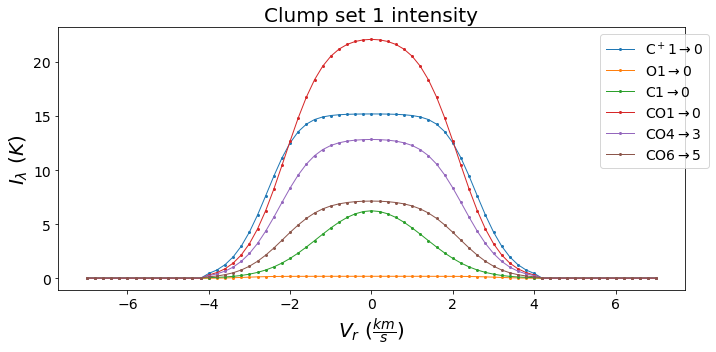

In [9]:
%matplotlib inline

test_calc = True
test_opacity = True
test_pexp = True
test_fv = True

# Use these to change the voxel properties, which is necessary in the default mode.
parameters = {
                # Model parameters#25.0/3600.0/180.0*np.pi*870.,#
                'voxel_size' : 0.1,
                 'molecules' : 'all',
#                  'molecules' : ['C+ 1', 'C 1', 'CO 1'],
                      'dust' : 'PAH',
#                       'dust' : 'molecular',
            'clumpMassRange' : [[0, -3]],
           'clumpMassNumber' : [4],
                 'clumpNmax' : [1],
             'velocityRange' : [-7, 7],
            'velocityNumber' : 71,

                # Voxel properties
                  'velocity' : 0,
        'ensembleDispersion' : 1,
              'ensembleMass' : 10**0.8,
#               'volumeFactor' : [0.8, 0.2],
           'ensembleDensity' : 10**4.8,
                       'FUV' : 10**1.7,
                      # 'crir' : 2e-16,
    
                # logging
                   'verbose' : True,
                     'timed' : False,
                     'debug' : False
          }

t0 = time()
    
# for p in prop:
for _ in range(1):
    t1 = time()
    vox = models.Voxel()
    vox.setProperties(**parameters)
    vox.calculateEmission(test_calc=test_calc, test_opacity=test_opacity, test_pexp=test_pexp, test_fv=test_fv, 
                          verbose=False, timed=False)
    print(time()-t1)

print(time()-t0, '\n')
print('\nVolume Filling Factor')
print('---------------------')
print('\n'.join(['Clump {}: {:.3f}'.format(_+1, vox.getVolumeFillingFactor()[_]) for _ in range(models.constants.ensembles)]))
print('\nDensity')
print('---------------------')
print('\n'.join(['Clump {}: {:.3e}'.format(_+1, vox.getDensity()[_]) for _ in range(models.constants.ensembles)]))
print()
# vox.plotMolecule(quantity='intensity', molecule=['C+ 1', 'C 1', 'CO 1'], moleculeName=[r'$\mathrm{C}^+ 1 \rightarrow 0$', r'$\mathrm{C} 1 \rightarrow 0$', r'$\mathrm{CO} 1 \rightarrow 0$'], title='Dense voxel')
vox.plotMolecule(quantity='intensity', 
                 molecule=['C+ 1', 
                           'O 1', 
                           'C 1', 
                           'CO 1', 
                           'CO 4', 
                           'CO 6'], 
                 moleculeName=[r'$\mathrm{C}^+ 1 \rightarrow 0$', 
                               r'$\mathrm{O} 1 \rightarrow 0$', 
                               r'$\mathrm{C} 1 \rightarrow 0$', 
                               r'$\mathrm{CO} 1 \rightarrow 0$', 
                               r'$\mathrm{CO} 4 \rightarrow 3$', 
                               r'$\mathrm{CO} 6 \rightarrow 5$'])
# plt.show()

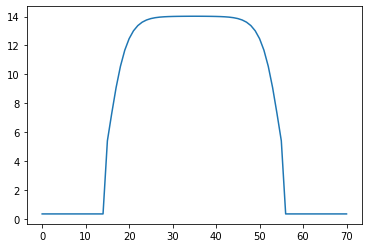

In [8]:
val = vox.getSpeciesEmissivity()[0, :, models.species.molecules.index('C+ 1')]/vox.getSpeciesAbsorption()[0, :, models.species.molecules.index('C+ 1')]

plt.plot(val)

In [47]:
models.masspoints.clumpIntensity[0][:, 201].sum()/models.masspoints.clumpOpticalDepth[0][:, 201].sum()

8.769682251719134

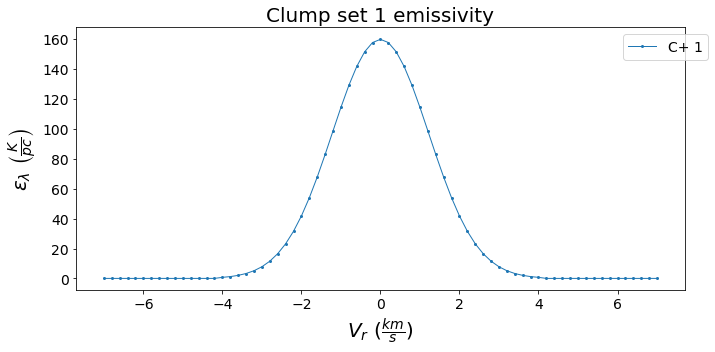

In [32]:
vox.plotMolecule(molecule='C+ 1', quantity='emissivity')

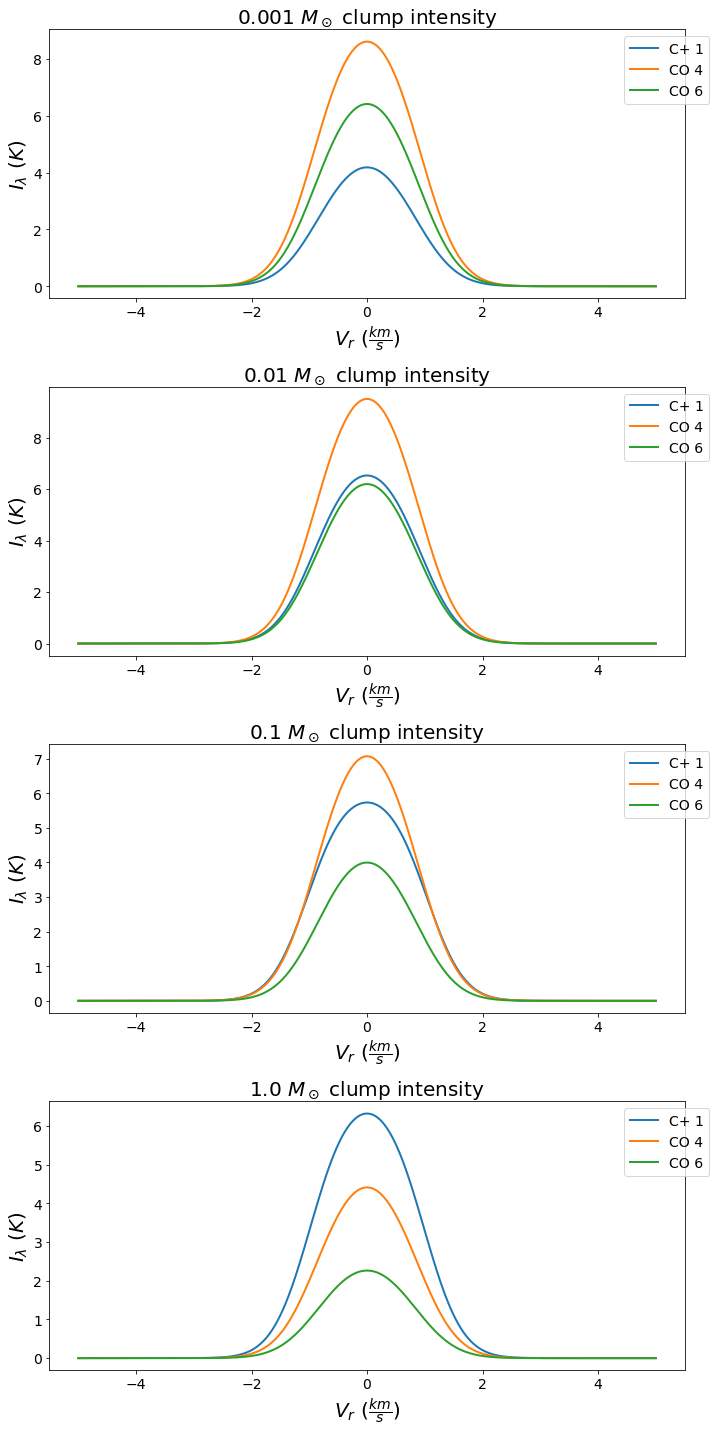

In [9]:
models.masspoints.plotIntensity(molecule=['C+ 1', 'CO 4', 'CO 6'])

## 

## Comparison to old calculation

### self-absorption issue

There is a self-absorption issue with the single-voxel model due to how the intensity is calculated. Below we investigate a possible solution to this issue, which we will document here until it is implemented.

*Volker:*
> Monochromatcally, i.e. for each velocity, we have the emissivity of a single clump as $\epsilon_{clump} = I_{clump}\frac{\tau_{clump}}{L_{clump}}/[1-\exp(-\tau_{clump})]$
where $L_{clump}$ is the physical mean length of the clump (drops out later). Opacities and emissivities are directly additive. That means that for the cell we get an emissivity
$$
\epsilon_{cell} = \sum_{clumps} \frac{I_{clump} \times A_{clump} \times \tau_{clump}}{[1-\exp(-\tau_{clump})] \times V_{cell}}
$$

> for the ensemble opacity we have $\kappa_x=\sum_{clumps} \frac{ \tau_{clump}\times A_{clump}}{V_{cell}}$ which has to be used with the corresponding probability in Eqs. (5.23) or (5.35) from Silke's thesis to get $\kappa_{cell}$. Then we are back at the standard RT equation for each cell: 
$$
I_{cell}=\frac{\epsilon_{cell}}{\kappa_{cell}}[1-\exp(-\tau_{cell})].
$$

Comparison with the standard single-voxel example:

### old calculation

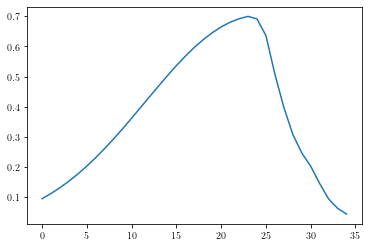

In [11]:
plt.plot(old_vox.getDustEmissivity()[0].max(0)[::-1])

In [9]:
from scipy.interpolate import interp1d

fx = interp1d(models.constants.wavelengths[models.constants.nDust], old_vox.getDustEmissivity()[0].max(0), fill_value='extrapolate')

In [14]:
i = (old_vox.getSpeciesEmissivity(include_dust=False)[0]<0)
[models.species.molecules[idx] for idx in np.unique(np.where(i)[1])]

[]

In [15]:
(models.observations.tbCenterline[1]<0).shape

(891, 504)

In [10]:
old_vox.getSpeciesIntensity(include_dust=False)[0][35, :]

array([ 3.80916439e+01,  1.21574309e+00,  1.35205048e+00,  2.28988829e-06,
        8.17709936e+00,  3.10411421e+01,  6.17367859e-04,  7.89859813e+00,
        8.31969565e+00,  7.89977952e+00,  6.94325946e+00,  5.78215950e+00,
        4.63350078e+00,  3.62647152e+00,  2.70986102e+00,  1.69712894e+00,
        7.10490311e-01,  1.76724920e-01,  3.35017327e-02,  8.45610248e-03,
        3.20981718e-03,  1.55176041e-03,  8.44198211e-04,  4.56526107e-04,
        2.44685213e-04,  1.28047511e-04,  6.40273998e-05,  3.12586031e-05,
        1.94463116e-05,  4.11393215e-06, -7.85860089e-06, -7.56852999e-06,
       -1.16680002e-06, -1.59499182e-05, -1.13316841e-05, -1.15709546e-05,
       -2.02237392e-05, -3.76708685e-06, -2.32210281e-05, -1.11367431e-06,
       -2.44240077e-05, -2.19433019e-06, -2.57198531e-05, -2.69465527e-06,
       -2.58883885e-05, -1.17092033e-05, -2.26091470e-05, -2.10381800e-05,
       -1.24463367e-05, -2.64642545e-05, -7.58167394e-06, -2.24043712e-05,
       -2.29717357e-05, -

In [12]:
old_vox.getSpeciesAbsorption(include_dust=False)[0][35, :]

array([ 1.90852135e+00,  6.48134899e-02,  7.29179465e-02,  2.46948981e-09,
        6.33162078e+00,  1.02383434e+00,  3.98496627e-06,  7.04024293e-01,
        7.40216288e-01,  7.65961980e-01,  7.82658191e-01,  7.87377988e-01,
        7.80118045e-01,  7.62697253e-01,  7.35781961e-01,  6.75127936e-01,
        3.95483763e-01,  8.77731457e-02,  8.93770772e-03,  1.11768389e-03,
        2.13115268e-04,  6.36375208e-05,  2.59820870e-05,  1.31965075e-05,
        6.71794278e-06,  3.43279428e-06,  1.76445757e-06,  8.99428698e-07,
        4.53430150e-07,  2.24785695e-07,  1.11458286e-07,  5.78989616e-08,
        3.38158408e-08,  2.21165498e-08,  1.54129320e-08,  1.10354175e-08,
        7.98534033e-09,  5.77989862e-09,  4.16719248e-09,  2.98178038e-09,
        2.11700196e-09,  1.48915513e-09,  1.03720715e-09,  7.15180248e-10,
        4.87659690e-10,  3.28935656e-10,  2.18753682e-10,  1.42836964e-10,
        9.04173403e-11,  5.35027578e-11,  2.10800266e-11,  0.00000000e+00,
        0.00000000e+00,  

In [8]:
old_vox.getDustIntensity()[0]

array([[0.27535987],
       [0.27535987],
       [0.27535987],
       [0.27535987],
       [0.27535987],
       [0.27535987],
       [0.27535987],
       [0.27535987],
       [0.27535987],
       [0.27535987],
       [0.27535987],
       [0.27535987],
       [0.27535987],
       [0.27535987],
       [0.27535987],
       [0.27535987],
       [0.27535987],
       [0.27535987],
       [0.27535987],
       [0.27535987],
       [0.27535987],
       [0.27535987],
       [0.27535987],
       [0.27535987],
       [0.27535987],
       [0.27535987],
       [0.27535987],
       [0.27535987],
       [0.27535987],
       [0.27535987],
       [0.27535987],
       [0.27535987],
       [0.27535987],
       [0.27535987],
       [0.27535987],
       [0.27535987],
       [0.27535987],
       [0.27535987],
       [0.27535987],
       [0.27535987],
       [0.27535987],
       [0.27535987],
       [0.27535987],
       [0.27535987],
       [0.27535987],
       [0.27535987],
       [0.27535987],
       [0.275

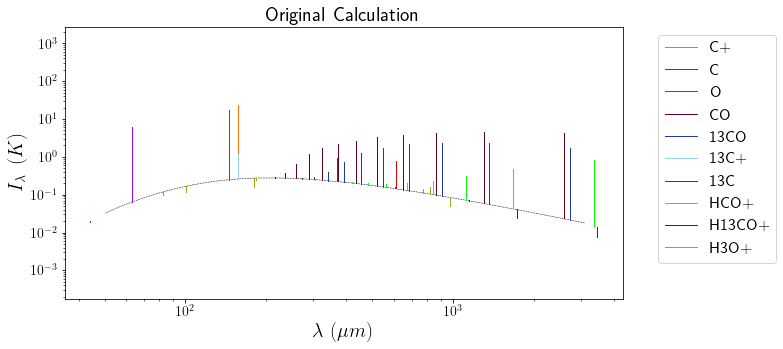

In [3]:
old_vox.plotSpectrum(quantity='intensity', vel=25, title='Original Calculation')

In [12]:
del old_vox

74.10818982124329
74.10845875740051 


Volume Filling Factor
---------------------
Clump 1: 4.047

Density
---------------------
Clump 1: 1.000e+05



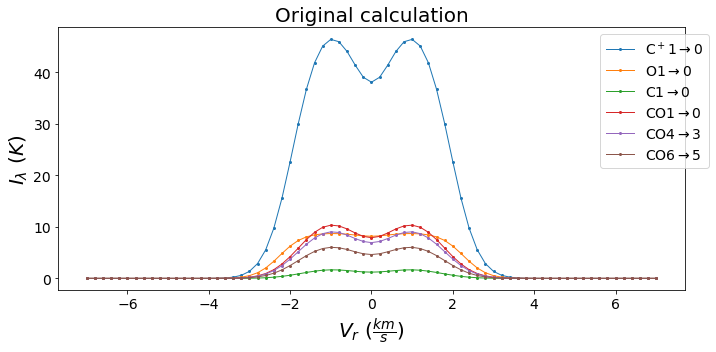

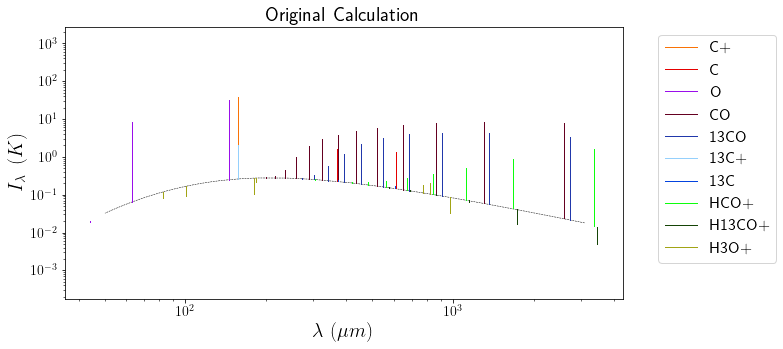

179.31981126846696

In [2]:
%matplotlib inline

test_calc = False
test_opacity = False
test_pexp = False
test_fv = True

# Use these to change the voxel properties, which is necessary in the default mode.
parameters = {
                # Model parameters#25.0/3600.0/180.0*np.pi*870.,#
                'voxel_size' : 0.1,
                 'molecules' : 'all',
#                  'molecules' : ['C+ 1', 'C 1', 'CO 1'],
                      # 'dust' : 'PAH',
                      'dust' : 'molecular',
            'clumpMassRange' : [[1]],
           'clumpMassNumber' : [1],
                 'clumpNmax' : [1],
             'velocityRange' : [-7, 7],
            'velocityNumber' : 71,
       'velocity_resolution' : 1,

                # Voxel properties
                  'velocity' : 0,
        'ensembleDispersion' : 1,
              'ensembleMass' : 10,
#               'volumeFactor' : [0.8, 0.2],
           'ensembleDensity' : 10**5,
                       'FUV' : 10**4,
                      # 'crir' : 2e-16,
    
                # logging
                   'verbose' : True,
                     'timed' : False,
                     'debug' : False
          }

t0 = time()
    
# for p in prop:
for _ in range(1):
    t1 = time()
    old_vox = models.Voxel()
    old_vox.setProperties(**parameters)
    old_vox.calculateEmission(test_calc=test_calc, test_opacity=test_opacity, test_pexp=test_pexp, test_fv=test_fv, 
                          verbose=False, timed=False)
    print(time()-t1)

print(time()-t0, '\n')
print('\nVolume Filling Factor')
print('---------------------')
print('\n'.join(['Clump {}: {:.3f}'.format(_+1, old_vox.getVolumeFillingFactor()[_]) for _ in range(models.constants.ensembles)]))
print('\nDensity')
print('---------------------')
print('\n'.join(['Clump {}: {:.3e}'.format(_+1, old_vox.getDensity()[_]) for _ in range(models.constants.ensembles)]))
print()
# vox.plotMolecule(quantity='intensity', molecule=['C+ 1', 'C 1', 'CO 1'], moleculeName=[r'$\mathrm{C}^+ 1 \rightarrow 0$', r'$\mathrm{C} 1 \rightarrow 0$', r'$\mathrm{CO} 1 \rightarrow 0$'], title='Dense voxel')
old_vox.plotMolecule(quantity='intensity', 
                     molecule=['C+ 1', 
                               'O 1', 
                               'C 1', 
                               'CO 1', 
                               'CO 4', 
                               'CO 6'], 
                     moleculeName=[r'$\mathrm{C}^+ 1 \rightarrow 0$', 
                                   r'$\mathrm{O} 1 \rightarrow 0$', 
                                   r'$\mathrm{C} 1 \rightarrow 0$', 
                                   r'$\mathrm{CO} 1 \rightarrow 0$', 
                                   r'$\mathrm{CO} 4 \rightarrow 3$', 
                                   r'$\mathrm{CO} 6 \rightarrow 5$',
                                   r'$$'],
                     title='Original calculation')
old_vox.plotSpectrum(quantity='intensity', title='Original Calculation')
# plt.show()
old_vox.getSpeciesIntensity(integrated=True)[0, 0]

### 

In [6]:
models.masspoints.clumpIntensity[0][:, 201]

array([135.00012163])

In [7]:
I = models.masspoints.clumpIntensity[0][:, 201].sum()
tau = models.masspoints.clumpOpticalDepth[0][:, 201].sum()

I/tau * (1-np.exp(-tau))

61.38903461410389

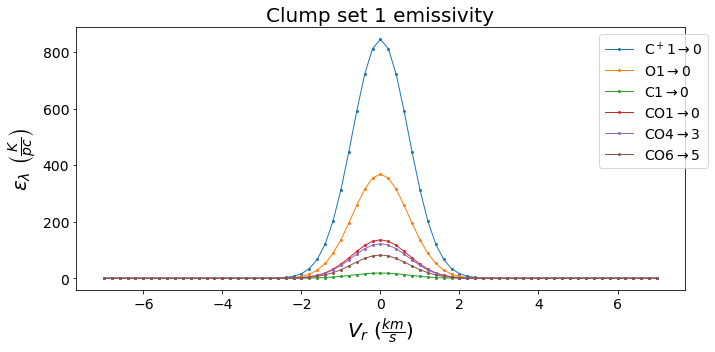

In [4]:
old_vox.plotMolecule(quantity='emissivity', 
                     molecule=['C+ 1', 
                               'O 1', 
                               'C 1', 
                               'CO 1', 
                               'CO 4', 
                               'CO 6'], 
                     moleculeName=[r'$\mathrm{C}^+ 1 \rightarrow 0$', 
                                   r'$\mathrm{O} 1 \rightarrow 0$', 
                                   r'$\mathrm{C} 1 \rightarrow 0$', 
                                   r'$\mathrm{CO} 1 \rightarrow 0$', 
                                   r'$\mathrm{CO} 4 \rightarrow 3$', 
                                   r'$\mathrm{CO} 6 \rightarrow 5$'])

In [11]:
I = models.masspoints.clumpIntensity[0][:, 201].sum()
ds = models.constants.voxel_size

I / ds

843.7507601762301

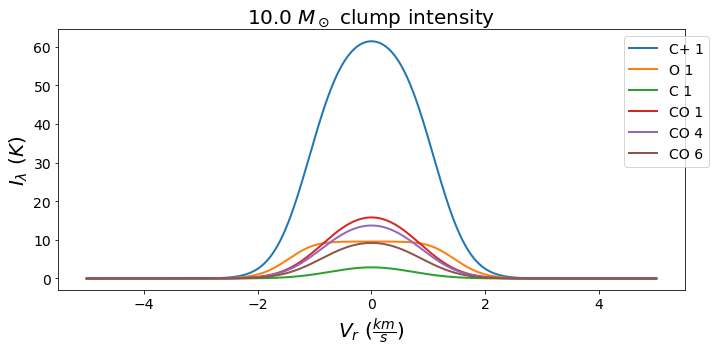

In [10]:
models.masspoints.plotIntensity(quantity='intensity', 
                                molecule=['C+ 1', 
                                          'O 1', 
                                          'C 1', 
                                          'CO 1', 
                                          'CO 4', 
                                          'CO 6'],
                                test_calc=False)

### new calculation:

0.36051225662231445
0.36076855659484863 


Volume Filling Factor
---------------------
Clump 1: 4.047

Density
---------------------
Clump 1: 1.000e+05



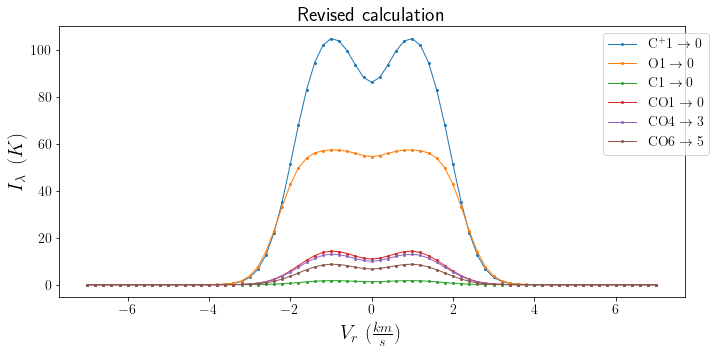

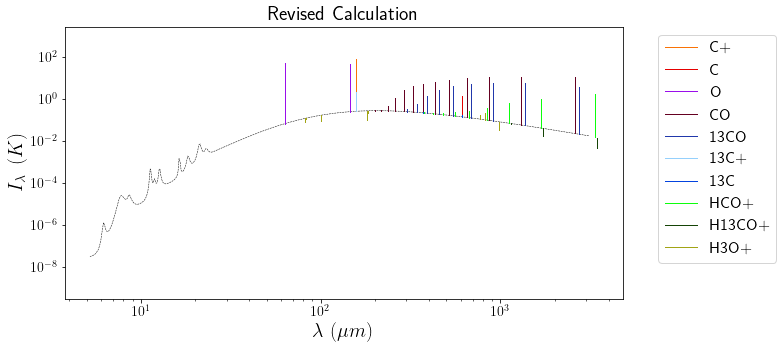

405.29682580216996

In [3]:
%matplotlib inline

test_calc = True
test_opacity = False
test_pexp = False
test_fv = True

# Use these to change the voxel properties, which is necessary in the default mode.
parameters = {
                # Model parameters#25.0/3600.0/180.0*np.pi*870.,#
                'voxel_size' : 0.1,
                 'molecules' : 'all',
#                  'molecules' : ['C+ 1', 'C 1', 'CO 1'],
                      'dust' : 'PAH',
#                       'dust' : 'molecular',
            'clumpMassRange' : [[1]],
           'clumpMassNumber' : [1],
                 'clumpNmax' : [1],
             'velocityRange' : [-7, 7],
            'velocityNumber' : 71,
       'velocity_resolution' : 1,

                # Voxel properties
                  'velocity' : 0,
        'ensembleDispersion' : 1,
              'ensembleMass' : 10,
#               'volumeFactor' : [0.8, 0.2],
           'ensembleDensity' : 10**5,
                       'FUV' : 10**4,
                      # 'crir' : 2e-16,
    
                # logging
                   'verbose' : True,
                     'timed' : False,
                     'debug' : False
          }

t0 = time()
    
# for p in prop:
for _ in range(1):
    t1 = time()
    new_vox = models.Voxel()
    new_vox.setProperties(**parameters)
    new_vox.calculateEmission(test_calc=test_calc, test_opacity=test_opacity, test_pexp=test_pexp, test_fv=test_fv, 
                          verbose=False, timed=False)
    print(time()-t1)

print(time()-t0, '\n')
print('\nVolume Filling Factor')
print('---------------------')
print('\n'.join(['Clump {}: {:.3f}'.format(_+1, new_vox.getVolumeFillingFactor()[_]) for _ in range(models.constants.ensembles)]))
print('\nDensity')
print('---------------------')
print('\n'.join(['Clump {}: {:.3e}'.format(_+1, new_vox.getDensity()[_]) for _ in range(models.constants.ensembles)]))
print()
# vox.plotMolecule(quantity='intensity', molecule=['C+ 1', 'C 1', 'CO 1'], moleculeName=[r'$\mathrm{C}^+ 1 \rightarrow 0$', r'$\mathrm{C} 1 \rightarrow 0$', r'$\mathrm{CO} 1 \rightarrow 0$'], title='Dense voxel')
new_vox.plotMolecule(quantity='intensity', 
                     molecule=['C+ 1', 
                               'O 1', 
                               'C 1', 
                               'CO 1', 
                               'CO 4', 
                               'CO 6'], 
                     moleculeName=[r'$\mathrm{C}^+ 1 \rightarrow 0$', 
                                   r'$\mathrm{O} 1 \rightarrow 0$', 
                                   r'$\mathrm{C} 1 \rightarrow 0$', 
                                   r'$\mathrm{CO} 1 \rightarrow 0$', 
                                   r'$\mathrm{CO} 4 \rightarrow 3$', 
                                   r'$\mathrm{CO} 6 \rightarrow 5$'],
                     title='Revised calculation')
new_vox.plotSpectrum(quantity='intensity', title='Revised Calculation')
# plt.show()
new_vox.getSpeciesIntensity(integrated=True)[0, 0]

### 

In [21]:
I = models.masspoints.clumpIntensity[0][:, 201].sum()
tau = models.masspoints.clumpOpticalDepth[0][:, 201].sum()
rcl = models.masspoints.clumpRadius[0][0, 0]
ds = models.constants.voxel_size

eps = I * tau/(1-np.exp(-tau)) * 2*np.pi*rcl**2/ds**3
kap = tau * 2*np.pi*rcl**2/ds**3

eps/kap * (1-np.exp(-kap*ds))

158.16676642522177

In [18]:
rcl

0.0988554726631647

In [50]:
np.arange(3, 20)

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

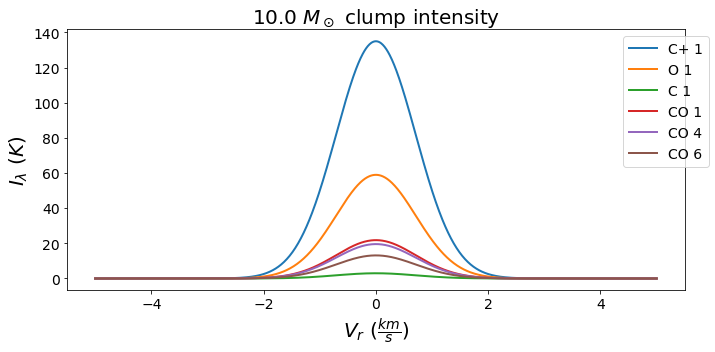

In [5]:
models.masspoints.plotIntensity(quantity='intensity', 
                                molecule=['C+ 1', 
                                          'O 1', 
                                          'C 1', 
                                          'CO 1', 
                                          'CO 4', 
                                          'CO 6'],
                                test_calc=True)

### integrated intensity

In [4]:
%matplotlib inline

# Use these to change the voxel properties, which is necessary in the default mode.
parameters = {
                # Model parameters#25.0/3600.0/180.0*np.pi*870.,#
                'voxel_size' : 0.1,
                 'molecules' : 'all',
                      'dust' : 'PAH',
            'clumpMassRange' : [[1]],
           'clumpMassNumber' : [1],
                 'clumpNmax' : [1],
             'velocityRange' : [-7, 7],
            'velocityNumber' : 71,
       'velocity_resolution' : 3,

                # Voxel properties
                  'velocity' : 0,
        'ensembleDispersion' : 1,
              'ensembleMass' : 10,
           'ensembleDensity' : 10**5,
                       'FUV' : 10**4,
                      # 'crir' : 2e-16,
    
                # logging
                   'verbose' : True,
                     'timed' : False,
                     'debug' : False
          }


f_velocity = np.arange(1, 30)
species = ['C+ 1', 
           'C 1', 'C 2', 'C 3', 
           'O 1', 'O 2', 'O 3', 
           'CO 1', 'CO 2', 'CO 3', 'CO 4', 'CO 5', 'CO 6', 'CO 7', 'CO 8', 'CO 9', 'CO 10', 
           'CO 11', 'CO 12', 'CO 13', 'CO 14', 'CO 15', 'CO 16', 'CO 17', 'CO 18', 'CO 19', 'CO 20', 
           'CO 21', 'CO 22', 'CO 23', 'CO 24', 'CO 25', 'CO 26', 'CO 27', 'CO 28', 'CO 29', 'CO 30', 
           'CO 31', 'CO 32', 'CO 33', 'CO 34', 'CO 35', 'CO 36', 'CO 37', 'CO 38', 'CO 39', 'CO 40', 
           'CO 41', 'CO 42', 'CO 43', 'CO 44', 'CO 45', 'CO 46', 'CO 47', 'CO 48', 'CO 49', 
           '13CO 1', '13CO 2', '13CO 3', '13CO 4', '13CO 5', '13CO 6', '13CO 7', '13CO 8', '13CO 9', '13CO 10', 
           '13CO 11', '13CO 12', '13CO 13', '13CO 14', '13CO 15', '13CO 16', '13CO 17', '13CO 18', '13CO 19', '13CO 20', 
           '13CO 21', '13CO 22', '13CO 23', '13CO 24', '13CO 25', '13CO 26', '13CO 27', '13CO 28', '13CO 29', '13CO 30', 
           '13CO 31', '13CO 32', '13CO 33', '13CO 34', '13CO 35', '13CO 36', '13CO 37', '13CO 38', '13CO 39', '13CO 40', 
           '13CO 41', '13CO 42', '13CO 43', '13CO 44', '13CO 45', '13CO 46', '13CO 47', '13CO 48', '13CO 49', 
           '13C+ 1', 
           '13C 1', '13C 2', '13C 3', 
           'HCO+ 1', 'HCO+ 2', 'HCO+ 3', 'HCO+ 4', 'HCO+ 5', 'HCO+ 6', 'HCO+ 7', 
           'HCO+ 8', 'HCO+ 9', 'HCO+ 10', 'HCO+ 11', 'HCO+ 12', 'HCO+ 13', 'HCO+ 14', 'HCO+ 15', 
           'H13CO+ 1', 'H13CO+ 2', 'H13CO+ 3', 'H13CO+ 4', 'H13CO+ 5', 'H13CO+ 6', 'H13CO+ 7', 'H13CO+ 8', 'H13CO+ 9', 'H13CO+ 10', 
           'H13CO+ 11', 'H13CO+ 12', 'H13CO+ 13', 'H13CO+ 14', 'H13CO+ 15', 'H13CO+ 16', 'H13CO+ 17', 'H13CO+ 18', 'H13CO+ 19', 'H13CO+ 20', 
           'H13CO+ 21', 'H13CO+ 22', 'H13CO+ 23', 'H13CO+ 24', 'H13CO+ 25', 'H13CO+ 26', 'H13CO+ 27', 'H13CO+ 28', 'H13CO+ 29', 'H13CO+ 30', 
           'H3O+ 1', 'H3O+ 2', 'H3O+ 3', 'H3O+ 4', 'H3O+ 5', 'H3O+ 6', 'H3O+ 7', 'H3O+ 8', 'H3O+ 9', 
           'H3O+ 10', 'H3O+ 11', 'H3O+ 12', 'H3O+ 13', 'H3O+ 14', 'H3O+ 15', 'H3O+ 16', 'H3O+ 17']
old_calculation = np.zeros((len(species), f_velocity.size))
new_calculation = np.zeros((len(species), f_velocity.size))

for i, f in enumerate(f_velocity):
    
    parameters['velocity_resolution'] = f
    
    old_vox = models.Voxel()
    old_vox.setProperties(**parameters)
    old_vox.calculateEmission(test_calc=False, test_fv=True, verbose=False, timed=False)
    old_integrated_intensity = old_vox.getSpeciesIntensity(integrated=True)[0, :]
    
    new_vox = models.Voxel()
    new_vox.setProperties(**parameters)
    new_vox.calculateEmission(test_calc=True, test_fv=True, verbose=False, timed=False)
    new_integrated_intensity = new_vox.getSpeciesIntensity(integrated=True)[0, :]
    
    for j, transition in enumerate(species):
        old_calculation[j, i] = old_integrated_intensity[models.species.molecules.index(species[j])]
        new_calculation[j, i] = new_integrated_intensity[models.species.molecules.index(species[j])]

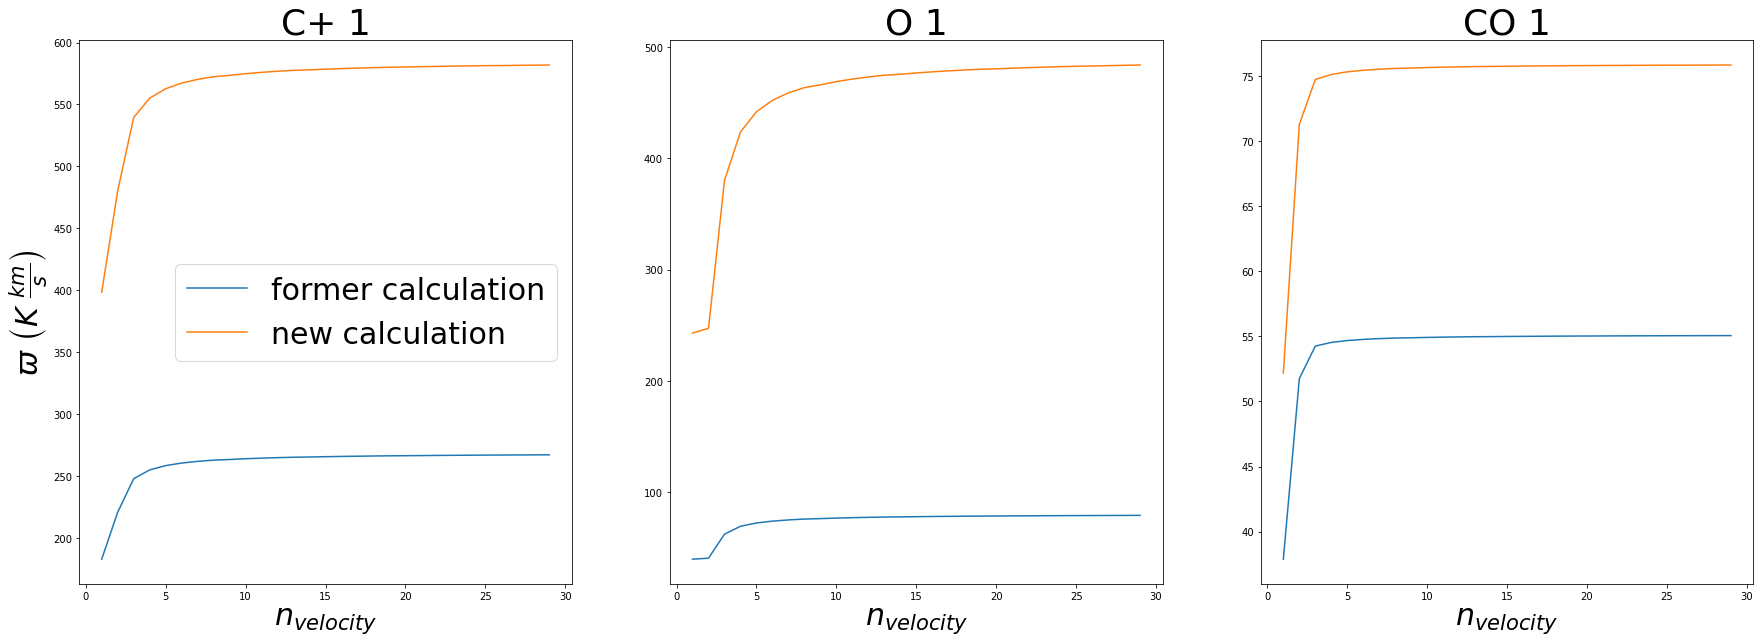

In [7]:
fs = 30

transitions = ['C+ 1', 'O 1', 'CO 1'] #['C 1', 'CO 4', 'CO 6'] #

fig, axes = plt.subplots(1, len(transitions), figsize=(10*len(transitions), 10))

for j, transition in enumerate(transitions):
    axes[j].plot(f_velocity, old_calculation[species.index(transition), :], label='former calculation')
    axes[j].plot(f_velocity, new_calculation[species.index(transition), :], label='new calculation')
    axes[j].set_xlabel(r'$n_{velocity}$', fontsize=fs)
    axes[j].set_title(transition, fontsize=fs+6)
    
axes[0].set_ylabel(r'$\varpi \ \left( K \ \frac{km}{s} \right)$', fontsize=fs)
axes[0].legend(loc='right', fontsize=fs)

plt.show()

## Other cells

In [7]:
I = models.masspoints.clumpIntensity[0][:, 201].sum()
tau = models.masspoints.clumpOpticalDepth[0][:, 201].sum()

I/tau * (1-np.exp(-tau))

61.38903461410389

In [21]:
models.masspoints.clumpIntensity[0][:, 201].sum()/models.masspoints.clumpOpticalDepth[0][:, 201].sum()

72.77410890092075

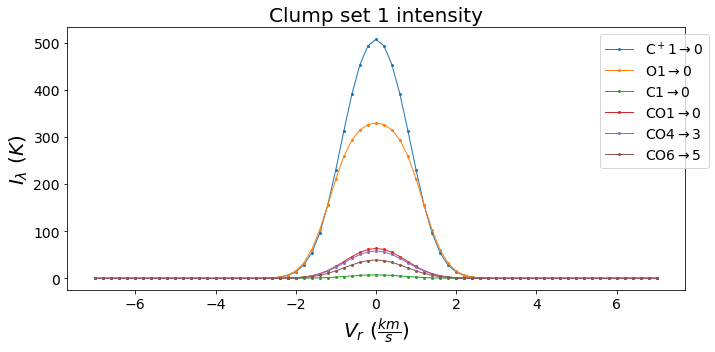

In [19]:
new_vox.plotMolecule(quantity='intensity', 
                     molecule=['C+ 1', 
                               'O 1', 
                               'C 1', 
                               'CO 1', 
                               'CO 4', 
                               'CO 6'], 
                     moleculeName=[r'$\mathrm{C}^+ 1 \rightarrow 0$', 
                                   r'$\mathrm{O} 1 \rightarrow 0$', 
                                   r'$\mathrm{C} 1 \rightarrow 0$', 
                                   r'$\mathrm{CO} 1 \rightarrow 0$', 
                                   r'$\mathrm{CO} 4 \rightarrow 3$', 
                                   r'$\mathrm{CO} 6 \rightarrow 5$'])

In [7]:
new_vox.getSpeciesIntensity()[0, :, models.species.molecules.index('O 1')]

array([ 0.13877053,  0.13877053,  0.13877053,  0.13877053,  0.13877053,
        0.13877053,  0.13877053,  0.13877053,  0.13877053,  0.13877053,
        0.13877053,  0.13877053,  0.13877053,  0.13877053,  0.13877053,
        0.13877053,  0.13877053,  0.13877053,  0.13877053,  0.13877053,
        0.13877053,  0.67820548,  1.70066857,  4.24707435,  9.7664175 ,
       19.5981963 , 32.74645892, 44.58830744, 51.44285432, 54.54215825,
       56.09525801, 56.97042361, 57.47651116, 57.76479977, 57.9133024 ,
       57.95915563, 57.9133024 , 57.76479977, 57.47651116, 56.97042361,
       56.09525801, 54.54215825, 51.44285432, 44.58830744, 32.74645892,
       19.5981963 ,  9.7664175 ,  4.24707435,  1.70066857,  0.67820548,
        0.13877053,  0.13877053,  0.13877053,  0.13877053,  0.13877053,
        0.13877053,  0.13877053,  0.13877053,  0.13877053,  0.13877053,
        0.13877053,  0.13877053,  0.13877053,  0.13877053,  0.13877053,
        0.13877053,  0.13877053,  0.13877053,  0.13877053,  0.13

In [18]:
np.amax(kappa)

inf

In [19]:
epsilon = new_vox.getSpeciesEmissivity()[0, :, models.species.molecules.index('O 1')]
kappa = new_vox.getSpeciesAbsorption()[0, :, models.species.molecules.index('O 1')]

intensity = epsilon/kappa*(1-np.exp(-kappa*models.constants.voxel_size))
i_inf = np.isinf(kappa)
intensity[i_inf] = epsilon[i_inf]/np.nanmax(kappa[~i_inf])*(1-np.exp(-np.nanmax(kappa[~i_inf])*models.constants.voxel_size))
intensity

array([ 0.24130506,  0.24130506,  0.24130506,  0.24130506,  0.24130506,
        0.24130506,  0.24130506,  0.24130506,  0.24130506,  0.24130506,
        0.24130506,  0.24130506,  0.24130506,  0.24130506,  0.24130506,
        0.24130506,  0.24130506,  0.24130506,  0.24130506,  0.24130506,
        0.24130506,  1.17205372,  2.90475708,  7.04417952, 15.19151291,
       27.165315  , 39.02698155, 47.1337854 , 51.87058928, 54.56827286,
       56.09581475, 56.97043164, 57.47650746, 70.11775307, 79.00082228,
       82.20526826, 79.00082228, 70.11775307, 57.47650746, 56.97043164,
       56.09581475, 54.56827286, 51.87058928, 47.1337854 , 39.02698155,
       27.165315  , 15.19151291,  7.04417952,  2.90475708,  1.17205372,
        0.24130506,  0.24130506,  0.24130506,  0.24130506,  0.24130506,
        0.24130506,  0.24130506,  0.24130506,  0.24130506,  0.24130506,
        0.24130506,  0.24130506,  0.24130506,  0.24130506,  0.24130506,
        0.24130506,  0.24130506,  0.24130506,  0.24130506,  0.24

In [35]:
models.masspoints.clumpRadius

[array([[0.0989]])]

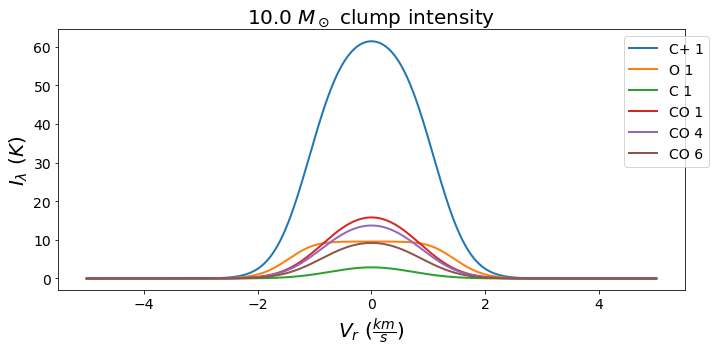

In [6]:
models.masspoints.plotIntensity(quantity='intensity', molecule=['C+ 1', 'O 1', 'C 1', 'CO 1', 'CO 4', 'CO 6'])

In [30]:
models.ensemble.print_ensembleparameters()


C L U M P   S E T   1

Nj:
[[1.]]
delta Nji:
[[1.]]

Normalised Nj:
[[1.]]
Normalised delta Nj:
[[1.]]



In [ ]:
ensembleDispersion = [1]
i_undef = (normalise == 0) | ((abs(models.ensemble.clumpVelocities[0])/ensembleDispersion[0]) > 4.74)
print(i_undef)
normalise = models.ensemble.clumpDeltaNji[0][-1, :]/models.ensemble.clumpDeltaNji[0][-1, :]
models.ensemble.clumpNormalisedDeltaNji[0] = models.ensemble.clumpDeltaNji[0]*normalise
print(models.ensemble.clumpNormalisedDeltaNji[0])
renormalise = 1.
models.ensemble.clumpNormalisedDeltaNji[0] = np.around(models.ensemble.clumpNormalisedDeltaNji[0]*renormalise)
clumpSurfaceProbability = np.array(np.pi*models.masspoints.clumpRadius[0].T**2 / models.constants.voxel_size**2/normalise/renormalise)
print(models.ensemble.clumpNormalisedDeltaNji[0])
print(clumpSurfaceProbability)
if (clumpSurfaceProbability>1).any():
    resize = np.array(np.pi*models.masspoints.clumpRadius[0].max()**2/models.constants.voxel_size**2/normalise/renormalise)
    renormalise2 = 1.
    models.ensemble.clumpNormalisedDeltaNji[0] = np.around(models.ensemble.clumpNormalisedDeltaNji[0]*renormalise2)
    print(models.ensemble.clumpNormalisedDeltaNji[0])
    clumpSurfaceProbability = np.array(np.pi*models.masspoints.clumpRadius[0].T**2/models.constants.voxel_size**2 / normalise/resize/renormalise/renormalise2)
    i_undef = i_undef | (models.ensemble.clumpNormalisedDeltaNji[0][-1,:]<1)
clumpProbableNumber = (models.ensemble.clumpNormalisedDeltaNji[0]*clumpSurfaceProbability)
clumpStandardDeviation = np.sqrt(models.ensemble.clumpNormalisedDeltaNji[0]*clumpSurfaceProbability * (1-clumpSurfaceProbability))
lower = np.zeros([models.constants.clumpLogMass[0].size, 1])
clumpLower = np.maximum(lower, np.floor(clumpProbableNumber-models.constants.nSigma*clumpStandardDeviation))
clumpUpper = np.minimum(models.ensemble.clumpNormalisedDeltaNji[0], np.ceil(clumpProbableNumber+models.constants.nSigma*clumpStandardDeviation))

clumpLower, clumpUpper, i_undef

[False False False False False False False False False]
[[ 0.0027  0.019   0.0775  0.1801  0.2386  0.1801  0.0775  0.019   0.0027]
 [ 0.0183  0.1314  0.536   1.2463  1.651   1.2463  0.536   0.1314  0.0183]
 [ 0.1269  0.9088  3.7083  8.622  11.4223  8.622   3.7083  0.9088  0.1269]
 [ 0.8779  6.287  25.6551 59.6499 79.0232 59.6499 25.6551  6.287   0.8779]]
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  1.  2.  1.  1.  0.  0.]
 [ 0.  1.  4.  9. 11.  9.  4.  1.  0.]
 [ 1.  6. 26. 60. 79. 60. 26.  6.  1.]]
[[1.9945 1.9945 1.9945 1.9945 1.9945 1.9945 1.9945 1.9945 1.9945]
 [0.2717 0.2717 0.2717 0.2717 0.2717 0.2717 0.2717 0.2717 0.2717]
 [0.037  0.037  0.037  0.037  0.037  0.037  0.037  0.037  0.037 ]
 [0.005  0.005  0.005  0.005  0.005  0.005  0.005  0.005  0.005 ]]
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  1.  2.  1.  1.  0.  0.]
 [ 0.  1.  4.  9. 11.  9.  4.  1.  0.]
 [ 1.  6. 26. 60. 79. 60. 26.  6.  1.]]


(array([[0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.]]),
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 1., 2., 1., 1., 0., 0.],
        [0., 1., 1., 2., 2., 2., 1., 1., 0.],
        [1., 1., 1., 2., 2., 2., 1., 1., 1.]]),
 array([False, False, False, False, False, False, False, False, False]))

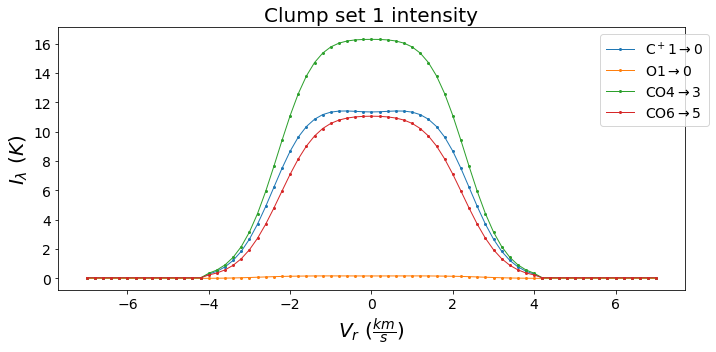

In [6]:
vox.plotMolecule(quantity='intensity', molecule=['C+ 1', 'O 1', 'CO 4', 'CO 6'], moleculeName=[r'$\mathrm{C}^+ 1 \rightarrow 0$', r'$\mathrm{O} 1 \rightarrow 0$', r'$\mathrm{CO} 4 \rightarrow 3$', r'$\mathrm{CO} 6 \rightarrow 5$'])

In [16]:
models.constants.clumpLogMass

[array([[-1., -2., -3.]])]

13.347023963928223
13.34736442565918 


Volume Filling Factor
---------------------
Clump 1: 0.004
Clump 2: 0.004

Density
---------------------
Clump 1: 1.000e+05
Clump 2: 1.000e+05



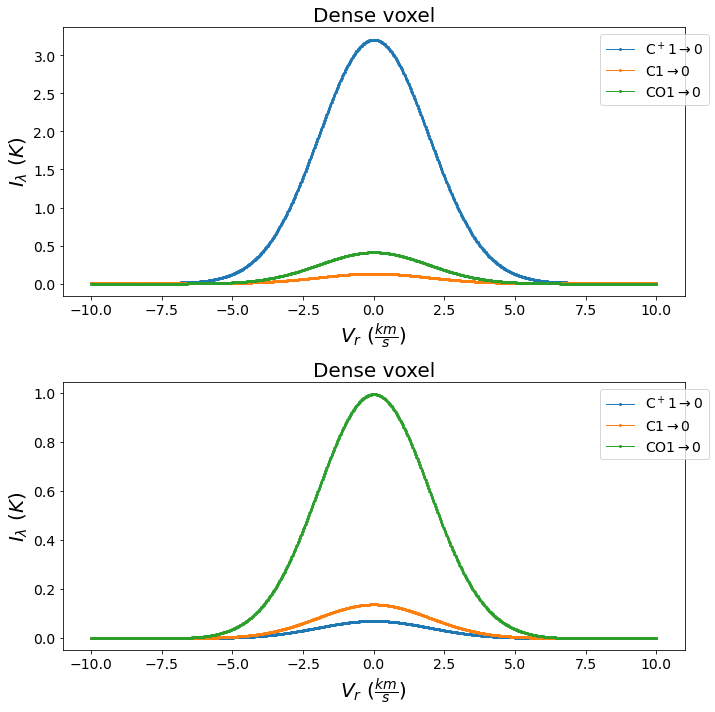

In [16]:
%matplotlib inline

inGrid = True

models.constants.dtype = np.float32

# Use these to change the voxel properties, which is necessary in the default mode.
parameters = {
                # Model parameters
                'voxel_size' : 1,
                 'molecules' : 'all',
#                  'molecules' : ['C+ 1', 'C 1', 'CO 1'],
#                       'dust' : 'PAH',
                      'dust' : 'molecular',
            'clumpMassRange' : [[0, 2], [-2]],
           'clumpMassNumber' : [3, 1],
                 'clumpNmax' : [1, 100],
             'velocityRange' : [-10, 10],
            'velocityNumber' : 1000,

                # Voxel properties
                  'velocity' : 0,
        'ensembleDispersion' : [1.8, 1.8],
              'ensembleMass' : [10, 10],
#               'volumeFactor' : [0.8, 0.2],
           'ensembleDensity' : [1e5, 1e5],
                       'FUV' : [1e5, 10],
                      'crir' : 1e-15
          }

if inGrid:
    models.constants.voxel_size = parameters['voxel_size']
#     models.constants.changeMassFunctionParameters(alpha=parameters['alpha'], gamma=parameters['gamma'])
    models.constants.changeVelocityRange(parameters['velocityRange'])
    models.constants.changeVelocityNumber(parameters['velocityNumber'])
    models.constants.addClumps(massRange=parameters['clumpMassRange'], num=parameters['clumpMassNumber'], Nmax=parameters['clumpNmax'], reset=True)
    models.constants.changeDustWavelengths(parameters['dust'])
    models.observations.methods.initialise()
    models.species.addMolecules(parameters['molecules'])
    models.interpolations.initialise()
    models.constants.dtype = np.float64

t0 = time()
    
# for p in prop:
for _ in range(1):
  t1 = time()
  vox = models.Voxel()
  vox.setProperties(**parameters, fromGrid=inGrid, timed=False)
  vox.calculateEmission(verbose=False, timed=False)
  print(time()-t1)

print(time()-t0, '\n')
print('\nVolume Filling Factor')
print('---------------------')
print('\n'.join(['Clump {}: {:.3f}'.format(_+1, vox.getVolumeFillingFactor()[_]) for _ in range(models.constants.ensembles)]))
print('\nDensity')
print('---------------------')
print('\n'.join(['Clump {}: {:.3e}'.format(_+1, vox.getDensity()[_]) for _ in range(models.constants.ensembles)]))
print()
vox.plotMolecule(quantity='intensity', molecule=['C+ 1', 'C 1', 'CO 1'], moleculeName=[r'$\mathrm{C}^+ 1 \rightarrow 0$', r'$\mathrm{C} 1 \rightarrow 0$', r'$\mathrm{CO} 1 \rightarrow 0$'], title='Dense voxel')
# plt.show()

In [13]:
vox.getSpeciesIntensity()[0][:, models.species.molecules.index('C+ 1')]

array([1.51170948e-04, 1.74696219e-03, 2.68561252e-02, 1.69351100e-01,
       5.97898940e-01, 8.75488389e-01, 5.97898940e-01, 1.69351100e-01,
       2.68561252e-02, 1.74696219e-03, 1.51170948e-04])

In [11]:
models.species.molecules.index('C+ 1')

0

In [22]:
for i in range(len(models.species.moleculeWavelengths)):
    print('{:>10}, nu={:.4e}, lambda={:.4e}'.format(models.species.molecules[i], models.species.moleculeFrequencies[i][0], models.species.moleculeWavelengths[i][0]))

      C+ 1, nu=1.9096e+12, lambda=1.5700e-04
       C 1, nu=4.9136e+11, lambda=6.1013e-04
       C 2, nu=8.1214e+11, lambda=3.6914e-04
       C 3, nu=1.3035e+12, lambda=2.2999e-04
       O 1, nu=4.7448e+12, lambda=6.3183e-05
       O 2, nu=2.0602e+12, lambda=1.4552e-04
       O 3, nu=6.8050e+12, lambda=4.4055e-05
      CO 1, nu=1.1527e+11, lambda=2.6008e-03
      CO 2, nu=2.3054e+11, lambda=1.3004e-03
      CO 3, nu=3.4580e+11, lambda=8.6696e-04
      CO 4, nu=4.6104e+11, lambda=6.5025e-04
      CO 5, nu=5.7627e+11, lambda=5.2023e-04
      CO 6, nu=6.9147e+11, lambda=4.3356e-04
      CO 7, nu=8.0665e+11, lambda=3.7165e-04
      CO 8, nu=9.2180e+11, lambda=3.2523e-04
      CO 9, nu=1.0369e+12, lambda=2.8912e-04
     CO 10, nu=1.1520e+12, lambda=2.6024e-04
     CO 11, nu=1.2670e+12, lambda=2.3661e-04
     CO 12, nu=1.3820e+12, lambda=2.1693e-04
     CO 13, nu=1.4969e+12, lambda=2.0027e-04
     CO 14, nu=1.6118e+12, lambda=1.8600e-04
     CO 15, nu=1.7266e+12, lambda=1.7363e-04
     CO 16

## `masspoints.calculateEmission()`

In [30]:
%%timeit

points = [1,6,5]
if models.constants.logEncoded:
  points = np.asarray(points)*10
verbose = False#verbose or verbose
if len(models.species.molecules):
  intensity = np.zeros(len(models.species.molecules))
  intensity_xi = 0
  for i,index in enumerate(models.species.moleculeIndeces):
    if models.constants.logEncoded:
      if models.constants.interpolation=='linear': intensity[i] = (10**(models.interpolations.intensityInterpolation[i](points)/10))
      elif models.constants.interpolation=='radial' or interpolation=='cubic': intensity[i] = (10**(models.interpolations.intensityInterpolation[i](points[0], points[1], points[2])/10))

    else:
      if models.constants.interpolation=='linear': intensity[i] = (10**models.interpolations.intensityInterpolation[i](points))
      elif models.constants.interpolation=='radial' or interpolation=='cubic': intensity[i] = (10**models.interpolations.intensityInterpolation[i](points[0], points[1], points[2]))
    # if (np.isnan(intensity[i]) or intensity[i]==0):
    #   intensity[i] = 10**-100
    #intensity[i] *= 2*constants.kB/4/np.pi/species.moleculeWavelengths[i]**2/10**-26
  if verbose:
    print('Calculated the intensity for {} species.'.format(len(speciesNumber)))
#     return intensity
    print()
else: print(None)

4.7 ms ± 339 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [20]:
from numba import jit

models.masspoints.reinitialise()
models.masspoints.setMasspointData([5.06e6], [1e4])

# @jit(nopython=False)
def masspointEmission(interpolationPoint, ens, masspoint, velocity=0, verbose=False, debug=False, test=False):
  '''
  This function calculates the emission of a single clump of the given mass/density/radius.
  '''
  
  radius = models.masspoints.clumpRadius[ens][0,masspoint]

  if debug:
    print('\n', interpolationPoint)

  # indeces = species.molecules.getInterpolationIndeces()

  intensity_xi = []
  opticalDepth_xi = []

  if len(models.species.molecules):
    # Intensity currently in converted to Jansky, to coinside with the dust continuum
    intensity = models.interpolations.interpolateIntensity(interpolationPoint)
    tau = models.interpolations.interpolateTau(interpolationPoint)

    intensity_xi.append(intensity)
    opticalDepth_xi.append(tau)

  else:
    intensity_xi.append([])
    opticalDepth_xi.append([])

  if debug: print(intensity)
  
  if models.constants.dust:
    intensity = (models.interpolations.interpolateDustIntensity(interpolationPoint))#/2/constants.kB*(constants.wavelengths)**2*10**-26)
    tau = models.interpolations.interpolateDustTau(interpolationPoint)

    # Append clump-corrected dust emission
    intensity_xi.append(intensity/np.pi/(np.arcsin(radius/10.)**2))
    opticalDepth_xi.append(tau)

  else:
    intensity_xi.append([])
    opticalDepth_xi.append([])

  intensity = np.append(intensity_xi[1], intensity_xi[0])
  opticalDepth = np.append(opticalDepth_xi[1], opticalDepth_xi[0])
  
  models.masspoints.clumpIntensity[ens].append(intensity)
  models.masspoints.clumpOpticalDepth[ens].append(opticalDepth)

  return #(intensity,opticalDepth)

# @jit(nopython=False)
def calculateEmission(tauFUV=0):
  '''
  This function can be called to set-up the clump emissions in the masspoints module. It calls masspointEmission() for
  each clump. 
  '''
  models.masspoints.clumpIntensity = [[] for _ in range(len(models.constants.clumpMassNumber))]
  models.masspoints.clumpOpticalDepth = [[] for _ in range(len(models.constants.clumpMassNumber))]

  print()
  for ens in range(len(models.constants.clumpMassNumber)):
    for i in range(models.constants.clumpLogMass[ens].size):
      t0 = time()
      gridpoint = [models.masspoints.clumpLogDensity[ens][0,i], models.constants.clumpLogMass[ens][0,i], models.masspoints.logFUV[ens]] #include Afuv
      masspointEmission(gridpoint, ens, i)
#       clumpIntensity[ens].append(emission[0])
#       clumpOpticalDepth[ens].append(emission[1])
      print(time()-t0)

    models.masspoints.clumpIntensity[ens] = np.array(models.masspoints.clumpIntensity[ens])
    models.masspoints.clumpOpticalDepth[ens] = np.array(models.masspoints.clumpOpticalDepth[ens])

  print()
  return



In [21]:
# %%timeit

calculateEmission()


0.03191232681274414
0.020914077758789062
0.023944377899169922



In [36]:
models.constants.nDust

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [18]:
from numba import jit

# @jit(nopython=False)
def masspointEmission(interpolationPoint, ens, masspoint, velocity=0, verbose=False, debug=False, test=False):
  '''
  This function calculates the emission of a single clump of the given mass/density/radius.
  '''
  
  radius = models.masspoints.clumpRadius[ens][0,masspoint]

  if debug:
    print('\n', interpolationPoint)

  # indeces = species.molecules.getInterpolationIndeces()

  intensity_xi = []
  opticalDepth_xi = []

  if len(models.species.molecules):
    # Intensity currently in converted to Jansky, to coinside with the dust continuum
    intensity = models.interpolations.interpolateIntensity(interpolationPoint)
    tau = models.interpolations.interpolateTau(interpolationPoint)

    intensity_xi.append(intensity)
    opticalDepth_xi.append(tau)

  else:
    intensity_xi.append([])
    opticalDepth_xi.append([])

  if debug: print(intensity)
  
  if models.constants.dust:
    intensity = (models.interpolations.interpolateDustIntensity(interpolationPoint))#/2/constants.kB*(constants.wavelengths)**2*10**-26)
    tau = models.interpolations.interpolateDustTau(interpolationPoint)

    # Append clump-corrected dust emission
    intensity_xi.append(intensity/np.pi/(np.arcsin(radius/10.)**2))
    opticalDepth_xi.append(tau)

  else:
    intensity_xi.append([])
    opticalDepth_xi.append([])

  intensity = np.append(intensity_xi[1], intensity_xi[0])
  opticalDepth = np.append(opticalDepth_xi[1], opticalDepth_xi[0])
  
#   models.masspoints.clumpIntensity[ens].append(intensity)
#   models.masspoints.clumpOpticalDepth[ens].append(opticalDepth)

  return (intensity,opticalDepth)

# @jit(nopython=False)
def calculateEmission(tauFUV=0):
  '''
  This function can be called to set-up the clump emissions in the masspoints module. It calls masspointEmission() for
  each clump. 
  '''
  clumpIntensity = [[] for _ in range(len(models.constants.clumpMassNumber))]
  clumpOpticalDepth = [[] for _ in range(len(models.constants.clumpMassNumber))]

  print()
  for ens in range(len(models.constants.clumpMassNumber)):
    for i in range(models.constants.clumpLogMass[ens].size):
      t0 = time()
      gridpoint = [models.masspoints.clumpLogDensity[ens][0,i], models.constants.clumpLogMass[ens][0,i], models.masspoints.logFUV[ens]] #include Afuv
      emission = masspointEmission(gridpoint, ens, i)
      clumpIntensity[ens].append(emission[0])
      clumpOpticalDepth[ens].append(emission[1])
      print(time()-t0)

    models.masspoints.clumpIntensity[ens] = np.array(clumpIntensity[ens])
    models.masspoints.clumpOpticalDepth[ens] = np.array(clumpOpticalDepth[ens])

  print()
  return



In [25]:
# %%timeit

calculateEmission()


0.03294777870178223
0.02090597152709961
0.017978668212890625



## `interpolations.interpolateIntensity()`

In [ ]:
def interpolateIntensity(points, verbose=False):
  '''
  This is converted from brightness temperature to Jansky units.
  '''
  # Fully 'encode' the interpolation points to the fortran standard
  if constants.logEncoded:
    points = np.asarray(points)*10
  verbose = verbose or verbose
  if len(species.molecules):
    intensity = np.zeros(len(species.molecules))
    intensity_xi = 0
    for i,index in enumerate(species.moleculeIndeces):
      if constants.logEncoded:
        if constants.interpolation=='linear': intensity[i] = (10**(intensityInterpolation[i](points)/10))
        elif constants.interpolation=='radial' or interpolation=='cubic': intensity[i] = (10**(intensityInterpolation[i](points[0], points[1], points[2])/10))
      
      else:
        if constants.interpolation=='linear': intensity[i] = (10**intensityInterpolation[i](points))
        elif constants.interpolation=='radial' or interpolation=='cubic': intensity[i] = (10**intensityInterpolation[i](points[0], points[1], points[2]))
      # if (np.isnan(intensity[i]) or intensity[i]==0):
      #   intensity[i] = 10**-100
      #intensity[i] *= 2*constants.kB/4/np.pi/species.moleculeWavelengths[i]**2/10**-26
    if verbose:
      print('Calculated the intensity for {} species.'.format(len(speciesNumber)))
    return intensity
  else: return
  
def interpolateDustIntensity(points, verbose=False):
  '''
  This will calculate the intensity in Jansky units.
  '''
  # Fully 'encode' the interpolation points to the fortran standard
  if constants.logEncoded:
    points = np.asarray(points)*10

  # if fortranEncoded:
    if constants.interpolation=='linear':
      intensity = []
      for dust in dustIntensityInterpolation:
        intensity.append(10**(dust(points)[0]/10))
    
    elif constants.interpolation=='radial' or interpolation=='cubic': intensity = (10**(dustIntensityInterpolation(points[0], points[1], points[2])/10))
  
  else:
    if constants.interpolation=='linear':
      intensity = []
      for dust in dustIntensityInterpolation:
        intensity.append(10**(dust(points)[0]))

    elif constants.interpolation=='radial' or interpolation=='cubic': intensity = (10**dustIntensityInterpolation(points[0], points[1], points[2]))
  
  intensity = np.asarray(intensity) * 10**-26 * constants.wavelengths[constants.nDust]**2/2/constants.kB

  return intensity

## Miscellanious debugging

Voxel emission calculated.

Volume Filling Factor
---------------------
Clump 1: 0.800

Density
---------------------
Clump 1: 5.058e+06



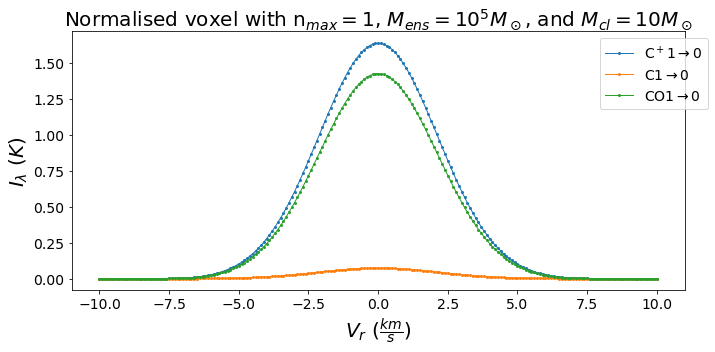

In [27]:
from kosmatau3d import models
import numpy as np
from time import time

inGrid = True

# Use these to change the voxel properties, which is necessary in the default mode.
parameters = { \
                # Model parameters
                'voxel_size' : 0.001, \
#                  'molecules' : 'all', \
                 'molecules' : ['C+ 1', 'C 1', 'CO 1'], \
#                       'dust' : 'PAH', \
                      'dust' : 'molecular', \
            'clumpMassRange' : [[0, 2]], \
           'clumpMassNumber' : [1], \
                 'clumpNmax' : [10], \
             'velocityRange' : [-10, 10], \
            'velocityNumber' : 201, \

                # Voxel properties
                  'velocity' : 0., \
        'ensembleDispersion' : [2], \
              'ensembleMass' : [1e-4], \
              'volumeFactor' : [0.8], \
#            'ensembleDensity' : 1e6, \
                       'FUV' : 1e4 \
          }

if inGrid:
    models.constants.voxel_size = parameters['voxel_size']
#     models.constants.changeMassFunctionParameters(alpha=parameters['alpha'], gamma=parameters['gamma'])
    models.constants.changeVelocityRange(parameters['velocityRange'])
    models.constants.changeVelocityNumber(parameters['velocityNumber'])
    models.constants.addClumps(massRange=parameters['clumpMassRange'], num=parameters['clumpMassNumber'], Nmax=parameters['clumpNmax'], reset=True)
    models.constants.changeDustWavelengths(parameters['dust'])
    models.observations.methods.initialise()
    models.species.addMolecules(parameters['molecules'])
    models.interpolations.initialise()
    models.constants.dtype = np.float64

# t0 = time()
    
# for _ in range(10):
vox = models.Voxel()
vox.setProperties(**parameters, fromGrid=inGrid, timed=False)
vox.calculateEmission(verbose=True, timed=False)

# print(time()-t0)
print('\nVolume Filling Factor')
print('---------------------')
print('\n'.join(['Clump {}: {:.3f}'.format(_+1, vox.getVolumeFillingFactor()[_]) for _ in range(1)]))
print('\nDensity')
print('---------------------')
print('\n'.join(['Clump {}: {:.3e}'.format(_+1, vox.getDensity()[_]) for _ in range(1)]))
print()
vox.plotMolecule(molecule=['C+ 1', 'C 1', 'CO 1'], moleculeName=[r'$\mathrm{C}^+ 1 \rightarrow 0$', r'$\mathrm{C} 1 \rightarrow 0$', r'$\mathrm{CO} 1 \rightarrow 0$'], title=r'Dense voxel with $\mathrm{n}_{max}=1$, $M_{ens}=10^5M_\odot$, and $M_{cl}=10M_\odot$')

In [8]:
vox.getDensity()

[4046604.500450896]

In [10]:
models.ensemble.printEnsembleParameters()


C L U M P   S E T   1

Nj:
[[0. 0. 0.]]
delta Nji:
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

Normalised Nj:
[[479.  69.  10.]]
Normalised delta Nj:
[[479.  69.  10.]
 [479.  69.  10.]
 [479.  69.  10.]
 [479.  69.  10.]
 [479.  69.  10.]
 [479.  69.  10.]
 [479.  69.  10.]
 [479.  69.  10.]
 [479.  69.  10.]
 [479.  69.  10.]
 [479.  69.  10.]
 [479.  69.  10.]
 [479.  69.  10.]
 [479.  69.  10.]
 [479.  69.  10

In [15]:
from kosmatau3d import models
import numpy as np
from time import time

inGrid = True

# Use these to change the voxel properties, which is necessary in the default mode.
parameters = { \
                # Model parameters
                'voxel_size' : 1, \
                 'molecules' : 'all', \
#                  'molecules' : ['C+ 1', 'C 1', 'CO 1'], \
                      'dust' : 'PAH', \
#                       'dust' : 'molecular', \
            'clumpMassRange' : [[0, 2]], \
           'clumpMassNumber' : [3], \
                 'clumpNmax' : [1], \
             'velocityRange' : [-10, 10], \
            'velocityNumber' : 201, \

                # Voxel properties
                  'velocity' : 0., \
        'ensembleDispersion' : [0], \
              'ensembleMass' : [1e5], \
              'volumeFactor' : [1], \
#            'ensembleDensity' : 1e6, \
                       'FUV' : 1e4 \
          }

if inGrid:
    models.constants.voxel_size = parameters['voxel_size']
#     models.constants.changeMassFunctionParameters(alpha=parameters['alpha'], gamma=parameters['gamma'])
    models.constants.changeVelocityRange(parameters['velocityRange'])
    models.constants.changeVelocityNumber(parameters['velocityNumber'])
    models.constants.addClumps(massRange=parameters['clumpMassRange'], num=parameters['clumpMassNumber'], Nmax=parameters['clumpNmax'], reset=True)
    models.constants.changeDustWavelengths(parameters['dust'])
    models.observations.methods.initialise()
    models.species.addMolecules(parameters['molecules'])
    models.interpolations.initialise()
    models.constants.dtype = np.float64

# t0 = time()
    
# for _ in range(10):
vox = models.Voxel()
vox.setProperties(**parameters, fromGrid=inGrid, timed=False)
vox.calculateEmission(verbose=True, timed=True)

# print(time()-t0)
# print('\nVolume Filling Factor')
# print('---------------------')
# print('\n'.join(['Clump {}: {:.3f}'.format(_+1, vox.getVolumeFillingFactor()[_]) for _ in range(1)]))
# print('\nDensity')
# print('---------------------')
# print('\n'.join(['Clump {}: {:.3f}'.format(_+1, vox.getDensity()[_]) for _ in range(1)]))
# print()
# vox.plotMolecule(molecule=['C+ 1', 'C 1', 'CO 1'], title=r'Normalised voxel with $\mathrm{n}_{max}=1$, $M_{ens}=10^5M_\odot$, and $M_{cl}=10M_\odot$')

resize
Masspoint emission calculated: 1.075124979019165
Combination emission calculated: 0.06183457374572754
Start I_xi calculation: 0.0
End I_xi calculation: 2.9560954570770264
Voxel emission calculated.
calculateEmission() time of execution: 5.601057767868042


In [56]:
models.combinations.clumpIntensity[0].shape

(2640, 372)

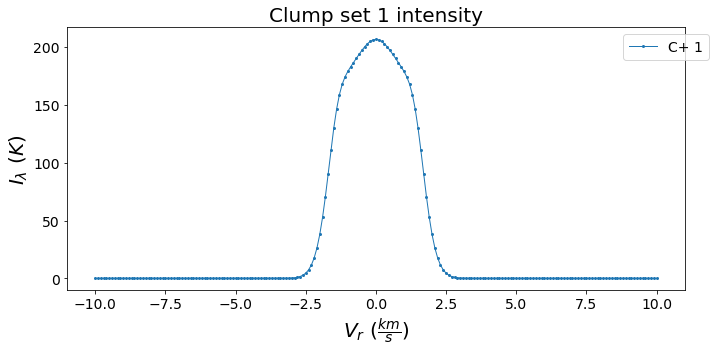

In [54]:
vox.plotMolecule(molecule='C+ 1')

In [3]:
# %%timeit

from numba import jit,njit
from time import time

# models.masspoints.clumpIntensity = [[] for ens in range(len(models.constants.clumpMassNumber))]
# models.masspoints.clumpOpticalDepth = [[] for ens in range(len(models.constants.clumpMassNumber))]
# models.combinations.clumpIntensity = [[] for ens in range(len(models.constants.clumpMassNumber))]
# models.combinations.clumpOpticalDepth = [[] for ens in range(len(models.constants.clumpMassNumber))]

@jit(nopython=False)
def calculateMasspointEmission(tauFUV=0):
  '''
  This function can be called to set-up the clump emissions in the masspoints module. It calls masspointEmission() for
  each clump. 
  '''
  clumpIntensity = [[] for _ in range(len(models.constants.clumpMassNumber))]
  clumpOpticalDepth = [[] for _ in range(len(models.constants.clumpMassNumber))]

  for ens in range(len(models.constants.clumpMassNumber)):
    for i in range(models.constants.clumpLogMass[ens].size):
      gridpoint = [models.masspoints.clumpLogDensity[ens][0,i], models.constants.clumpLogMass[ens][0,i], models.masspoints.logFUV[ens]] #include Afuv
      emission = masspointEmission(gridpoint, models.masspoints.clumpRadius[ens][0,i])
      clumpIntensity[ens].append(emission[0])
      clumpOpticalDepth[ens].append(emission[1])

    models.masspoints.clumpIntensity[ens] = np.array(clumpIntensity[ens])
    models.masspoints.clumpOpticalDepth[ens] = np.array(clumpOpticalDepth[ens])

  return

@jit(nopython=False)
def masspointEmission(interpolationPoint, radius, velocity=0, verbose=False, debug=False, test=False):
  '''
  This function calculates the emission of a single clump of the given mass/density/radius.
  '''

  if debug:
    print('\n', interpolationPoint)

  # indeces = species.molecules.getInterpolationIndeces()

  intensity_xi = []
  opticalDepth_xi = []

  if len(models.species.molecules):
    # Intensity currently in converted to Jansky, to coinside with the dust continuum
    intensity = models.interpolations.interpolateIntensity(interpolationPoint)
    tau = models.interpolations.interpolateTau(interpolationPoint)

    intensity_xi.append(intensity)
    opticalDepth_xi.append(tau)

  else:
    intensity_xi.append([])
    opticalDepth_xi.append([])

  if debug: print(intensity)
  
  if models.constants.dust:
    intensity = (models.interpolations.interpolateDustIntensity(interpolationPoint))#/2/constants.kB*(constants.wavelengths)**2*10**-26)
    tau = models.interpolations.interpolateDustTau(interpolationPoint)

    # Append clump-corrected dust emission
    intensity_xi.append(intensity/np.pi/(np.arcsin(radius/10.)**2))
    opticalDepth_xi.append(tau)

  else:
    intensity_xi.append([])
    opticalDepth_xi.append([])

  intensity = np.append(intensity_xi[1], intensity_xi[0])
  opticalDepth = np.append(opticalDepth_xi[1], opticalDepth_xi[0])

  return (intensity,opticalDepth)

# @jit(nopython=False)
def calculateCombinationEmission(array=False):
  '''
  This retrieves the emission from the masspoints, with dimensions (masspoints,species,velocity,velocity). It
  sums over the masspoint dimension. The probability will remain dormant until it is further-developed.
  '''
  CLintensityList = [[] for ens in range(len(models.constants.clumpMassNumber))]
  CLopticalDepthList = [[] for ens in range(len(models.constants.clumpMassNumber))]

  for ens in range(len(models.constants.clumpMassNumber)):
    
#     CLintensityList = np.zeros((models.combinations.clumpCombination[ens].shape[0], models.masspoints.clumpIntensity[ens].shape[0], models.masspoints.clumpIntensity[ens].shape[1]))
#     CLopticalDepthList = np.zeros((models.combinations.clumpCombination[ens].shape[0], models.masspoints.clumpIntensity[ens].shape[0], models.masspoints.clumpIntensity[ens].shape[1]))
    
    for i,c in enumerate(models.combinations.clumpCombination[ens]):
      CLintensityList[ens].append((c*models.masspoints.clumpIntensity[ens].T).T)
      CLopticalDepthList[ens].append((c*models.masspoints.clumpOpticalDepth[ens].T).T)
    
#     print((CLintensityList).shape)
#     print((CLopticalDepthList).shape)
    
    models.combinations.clumpIntensity[ens] = np.array(CLintensityList[ens]).sum(1)
    models.combinations.clumpOpticalDepth[ens] = np.array(CLopticalDepthList[ens]).sum(1)

  return

# @jit(nopython=False)
def calculateCombinationEmission2(array=False):
  '''
  This retrieves the emission from the masspoints, with dimensions (masspoints,species,velocity,velocity). It
  sums over the masspoint dimension. The probability will remain dormant until it is further-developed.
  '''
  CLintensityList = [[] for ens in range(len(models.constants.clumpMassNumber))]
  CLopticalDepthList = [[] for ens in range(len(models.constants.clumpMassNumber))]

  for ens in range(len(models.constants.clumpMassNumber)):
    
#     CLintensityList = np.zeros((models.combinations.clumpCombination[ens].shape[0], models.masspoints.clumpIntensity[ens].shape[0], models.masspoints.clumpIntensity[ens].shape[1]))
#     CLopticalDepthList = np.zeros((models.combinations.clumpCombination[ens].shape[0], models.masspoints.clumpIntensity[ens].shape[0], models.masspoints.clumpIntensity[ens].shape[1]))
    
    for i,c in enumerate(models.combinations.clumpCombination[ens]):
      CLintensityList[ens].append((c*models.masspoints.clumpIntensity[ens].T).T)
      CLopticalDepthList[ens].append((c*models.masspoints.clumpOpticalDepth[ens].T).T)
    
#     print((CLintensityList).shape)
#     print((CLopticalDepthList).shape)
    
    models.combinations.clumpIntensity[ens] = np.array(CLintensityList[ens]).sum(1)
    models.combinations.clumpOpticalDepth[ens] = np.array(CLopticalDepthList[ens]).sum(1)

  return

# @jit(nopython=False)
def calculateCombinationEmissionArray():
  '''
  This retrieves the emission from the masspoints, with dimensions (masspoints,species,velocity,velocity). It
  sums over the masspoint dimension. The probability will remain dormant until it is further-developed.
  '''
  
  CLintensityList = [np.zeros((models.combinations.clumpCombination[ens].shape[0], models.masspoints.clumpIntensity[ens].shape[0], models.masspoints.clumpIntensity[ens].shape[1])) for ens in range(len(models.constants.clumpMassNumber))]
  CLopticalDepthList = [np.zeros((models.combinations.clumpCombination[ens].shape[0], models.masspoints.clumpIntensity[ens].shape[0], models.masspoints.clumpIntensity[ens].shape[1])) for ens in range(len(models.constants.clumpMassNumber))]

  for ens in range(len(models.constants.clumpMassNumber)):
    
#     CLintensityList = np.zeros((models.combinations.clumpCombination[ens].shape[0], models.masspoints.clumpIntensity[ens].shape[0], models.masspoints.clumpIntensity[ens].shape[1]))
#     CLopticalDepthList = np.zeros((models.combinations.clumpCombination[ens].shape[0], models.masspoints.clumpIntensity[ens].shape[0], models.masspoints.clumpIntensity[ens].shape[1]))
    
    for i,c in enumerate(models.combinations.clumpCombination[ens]):
      CLintensityList[ens][i,:,:] = (c*models.masspoints.clumpIntensity[ens].T).T
      CLopticalDepthList[ens][i,:,:] = (c*models.masspoints.clumpOpticalDepth[ens].T).T
    
    models.combinations.clumpIntensity[ens] = CLintensityList[ens].sum(1)
    models.combinations.clumpOpticalDepth[ens] = CLopticalDepthList[ens].sum(1)

  return

t0 = time()

calculateMasspointEmission(tauFUV=0)
# models.masspoints.calculateEmission(tauFUV=0)

print('masspoint execution time: {:.4f}'.format(time()-t0))

# calculateCombinationEmission()
calculateCombinationEmissionArray()
# models.combinations.calculateEmission()

print('total execution time: {:.4f}'.format(time()-t0))

masspoint execution time: 2.9668
total execution time: 3.0137


In [31]:
%%timeit

# models.masspoints.clumpIntensity = [[] for ens in range(len(models.constants.clumpMassNumber))]
# models.masspoints.clumpOpticalDepth = [[] for ens in range(len(models.constants.clumpMassNumber))]
# models.combinations.clumpIntensity = [[] for ens in range(len(models.constants.clumpMassNumber))]
# models.combinations.clumpOpticalDepth = [[] for ens in range(len(models.constants.clumpMassNumber))]

# t0 = time()

calculateMasspointEmission()

# print('masspoint execution time: {:.4f}'.format(time()-t0))

calculateCombinationEmissionArray()

# print('total execution time: {:.4f}'.format(time()-t0))

153 ms ± 2.26 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [26]:
models.masspoints.clumpIntensity[0].shape

(3, 372)

In [27]:
models.combinations.clumpCombination[0].shape

(2640, 3)

## 

Normalised to $N_{n_{max}}=100$

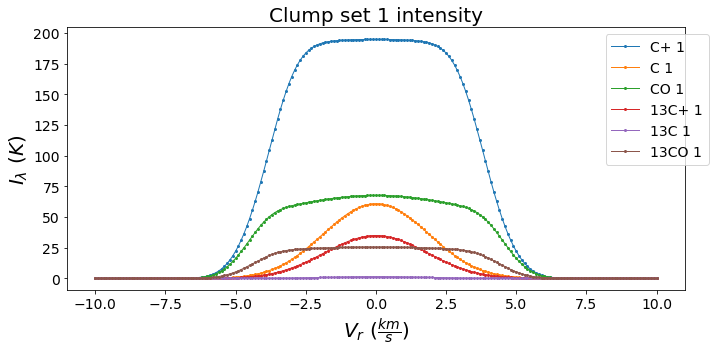

In [14]:
vox.plotMolecule(molecule=['C+ 1', 'C 1', 'CO 1', '13C+ 1', '13C 1', '13CO 1'], quantity='intensity', logscale=False)

Unnormalised

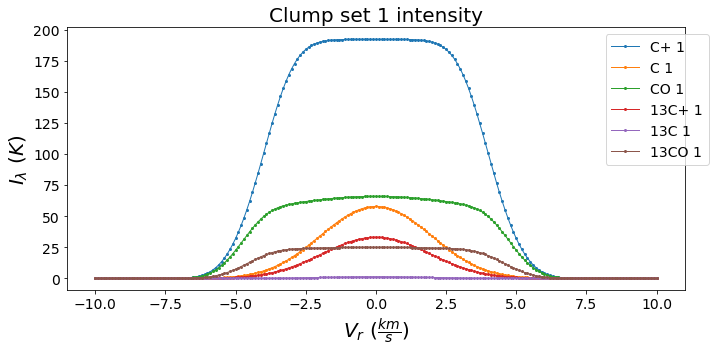

In [6]:
vox.plotMolecule(molecule=['C+ 1', 'C 1', 'CO 1', '13C+ 1', '13C 1', '13CO 1'], quantity='intensity', logscale=False)

Normalised to $N_{n_{max}}=1$

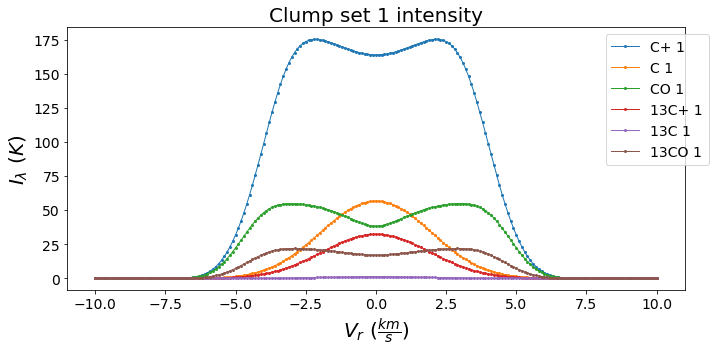

In [2]:
vox.plotMolecule(molecule=['C+ 1', 'C 1', 'CO 1', '13C+ 1', '13C 1', '13CO 1'], quantity='intensity', logscale=False)

In [5]:
models.masspoints.clumpRadius

[array([[0.01146348, 0.03106111]])]

In [4]:
models.masspoints.clumpLogDensity

[array([[6.52601921, 6.22731791]])]

In [18]:
models.ensemble.printEnsembleParameters()


C L U M P   S E T   1

Nj:
[[40892.4404  5910.756 ]]
delta Nji:
[[  25.2878    3.6552]
 [  38.061     5.5015]
 [  56.1817    8.1207]
 [  81.3304   11.7558]
 [ 115.4665   16.69  ]
 [ 160.7692   23.2382]
 [ 219.5301   31.7318]
 [ 293.9881   42.4942]
 [ 386.1087   55.8097]
 [ 497.3176   71.8843]
 [ 628.2063   90.8034]
 [ 778.2427  112.4903]
 [ 945.5231  136.6697]
 [1126.6097  162.8446]
 [1316.4948  190.2914]
 [1508.7215  218.0766]
 [1695.6778  245.1   ]
 [1869.0541  270.1605]
 [2020.4341  292.0416]
 [2141.9622  309.6077]
 [2227.0154  321.9017]
 [2270.8002  328.2305]
 [2270.8002  328.2305]
 [2227.0154  321.9017]
 [2141.9622  309.6077]
 [2020.4341  292.0416]
 [1869.0541  270.1605]
 [1695.6778  245.1   ]
 [1508.7215  218.0766]
 [1316.4948  190.2914]
 [1126.6097  162.8446]
 [ 945.5231  136.6697]
 [ 778.2427  112.4903]
 [ 628.2063   90.8034]
 [ 497.3176   71.8843]
 [ 386.1087   55.8097]
 [ 293.9881   42.4942]
 [ 219.5301   31.7318]
 [ 160.7692   23.2382]
 [ 115.4665   16.69  ]
 [  81.3304   1

In [5]:
profile_cl.shape

NameError: name 'profile_cl' is not defined

In [ ]:
np.array([models.combinations.clumpIntensity[0][:,models.species.speciesIndeces('C+ 1')]*profile_cl[0,j] for j in range(vel.size)]).shape

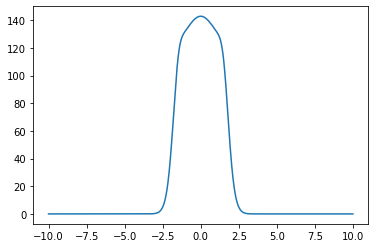

In [43]:
import matplotlib.pyplot as plt

multiplicity_min = [0, 0, 0]
multiplicity_max = [3, 2, 9]
sum = 'single'
vel = np.linspace(-10, 10, num=1000)
clumpVel = models.ensemble.clumpVelocities[0]
profile_cl = np.exp(-(vel.reshape(1,-1)-clumpVel.reshape(-1,1))**2/2/models.constants.clumpDispersion**2)
prob = models.ensemble.clumpProbability[0][0,:,:]
comb = models.ensemble.clumpCombinations[0][0,:,:]

for mol in ['C+ 1']:#, 'C 1', 'CO 1', '13C+ 1', '13C 1', '13CO 1']:
  
  imin = np.where((comb[:,0]==multiplicity_min[0])&(comb[:,1]==multiplicity_min[1])&(comb[:,2]==multiplicity_min[2]))[0][0]
  imax = np.where((comb[:,0]==multiplicity_max[0])&(comb[:,1]==multiplicity_max[1])&(comb[:,2]==multiplicity_max[2]))[0][0]
  pmax = prob[imin:imax,:].prod(1).sum()
  
  int_cl = models.combinations.clumpIntensity[0][imin:imax,models.species.speciesIndeces(mol)]

  int_fac = np.array([int_cl*profile_cl[0,j] for j in range(vel.size)])
#   print(int_fac.shape)
  del(int_cl)
  int_vel = np.array([(prob[imin:imax].prod(1)/pmax*int_fac[j,:,:].T).T for j in range(vel.size)])
#   print(int_vel.shape)
  del(int_fac)
  int_ens = np.array([int_vel])
#   print(int_ens.shape)
  del(int_vel)
  i = int_ens.sum(2).sum(0)
  del(int_ens)

  tau_cl = models.combinations.clumpOpticalDepth[0][imin:imax,models.species.speciesIndeces(mol)]
  
  tau_fac = np.array([tau_cl*profile_cl[0,j] for j in range(vel.size)])
  del(tau_cl)
  tau_vel = np.array([(prob[imin:imax].prod(1)/pmax*np.exp(-tau_fac[j,:,:].T)).T for j in range(vel.size)])
  del(tau_fac)
  tau_ens = np.array([tau_vel])
  del(tau_vel)
  t = (-np.log(tau_ens.sum(2))).sum(0)
  del(tau_ens)

#   plt.plot(vel, i)
#   plt.plot(vel, t)
  int = i/t*(1-np.exp(-t))
  int = np.nan_to_num(int)
  plt.plot(vel, int)
#   del(i)
#   del(t)

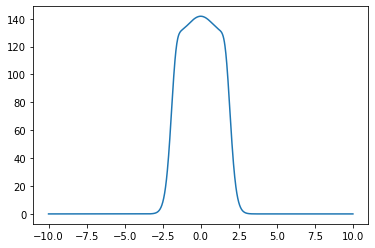

In [42]:
import matplotlib.pyplot as plt

multiplicity_min = [10, 10, 9]
multiplicity_max = [17, 17, 9]
sum = 'single'
vel = np.linspace(-10, 10, num=1000)
clumpVel = models.ensemble.clumpVelocities[0]
profile_cl = np.exp(-(vel.reshape(1,-1)-clumpVel.reshape(-1,1))**2/2/models.constants.clumpDispersion**2)
prob = models.ensemble.clumpProbability[0][0,:,:]
comb = models.ensemble.clumpCombinations[0][0,:,:]

for mol in ['C+ 1']:#, 'C 1', 'CO 1', '13C+ 1', '13C 1', '13CO 1']:
  
  imin = np.where((comb[:,0]==multiplicity_min[0])&(comb[:,1]==multiplicity_min[1])&(comb[:,2]==multiplicity_min[2]))[0][0]
  imax = np.where((comb[:,0]==multiplicity_max[0])&(comb[:,1]==multiplicity_max[1])&(comb[:,2]==multiplicity_max[2]))[0][0]+1
  pmax = prob[imin:imax,:].prod(1).sum()
  
  int_cl = models.combinations.clumpIntensity[0][imin:imax,models.species.speciesIndeces(mol)]

  int_fac = np.array([int_cl*profile_cl[0,j] for j in range(vel.size)])
#   print(int_fac.shape)
  del(int_cl)
  int_vel = np.array([(prob[imin:imax].prod(1)/pmax*int_fac[j,:,:].T).T for j in range(vel.size)])
#   print(int_vel.shape)
  del(int_fac)
  int_ens = np.array([int_vel])
#   print(int_ens.shape)
  del(int_vel)
  i = int_ens.sum(2).sum(0)
  del(int_ens)

  tau_cl = models.combinations.clumpOpticalDepth[0][imin:imax,models.species.speciesIndeces(mol)]
  
  tau_fac = np.array([tau_cl*profile_cl[0,j] for j in range(vel.size)])
  del(tau_cl)
  tau_vel = np.array([(prob[imin:imax].prod(1)/pmax*np.exp(-tau_fac[j,:,:].T)).T for j in range(vel.size)])
  del(tau_fac)
  tau_ens = np.array([tau_vel])
  del(tau_vel)
  t = (-np.log(tau_ens.sum(2))).sum(0)
  del(tau_ens)

#   plt.plot(vel, i)
#   plt.plot(vel, t)
  int = i/t*(1-np.exp(-t))
  int = np.nan_to_num(int)
  plt.plot(vel, int)
#   del(i)
#   del(t)

In [16]:
i.shape

(1000, 1)

In [19]:
vel.shape

(1000,)

In [33]:
from scipy.optimize import curve_fit

def gaus(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))
  
ipopt,ipcov = curve_fit(gaus,vel[300:700],i[300:700,0],p0=[1,0,0.71])
tpopt,tpcov = curve_fit(gaus,vel[300:700],t[300:700,0],p0=[1,0,0.71])

print('       Parameters: [amplitude      , x0            , sigma]')
print('    Intensity fit:', ipopt)
print('Optical depth fit:', tpopt)

       Parameters: [amplitude      , x0            , sigma]
    Intensity fit: [ 1.43050233e+03 -2.41159765e-09 -7.09189740e-01]
Optical depth fit: [1.22140084e+01 1.29911329e-11 7.09189740e-01]


/home/craig/miniconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [44]:
a = np.array([0])
a/a

array([nan])

In [ ]:
# [(prob[:i].prod(1)/pmax*np.exp(-tau_fac[j,:i,:].T)).T for j in range(vel.size)]
# [(prob[:i].prod(1)/pmax).T for j in range(vel.size)]
# [(np.exp(-tau_fac[j,:i,:].T)).T for j in range(vel.size)]
# [(prob[:i].prod(1)/pmax*int_fac[j,:i,:].T).T for j in range(vel.size)]

In [ ]:
i = np.where((comb[:,0]==8)&(comb[:,1]==8)&(comb[:,2]==9))[0][0]
prob.prod(1)[i:].sum()

In [ ]:
models.ensemble.printEnsembleParameters()

In [ ]:
models.ensemble.clumpSurfaceProbability[0]

In [ ]:
from scipy import stats

p = models.ensemble.clumpSurfaceProbability[0][:,0]
print(stats.binom.pmf([8,8,9], [440.,64.,9.,], p))
i = np.where((comb[:,0]==8)&(comb[:,1]==8)&(comb[:,2]==9))[0][0]
print(prob[i,:])

array([17, 17,  9])

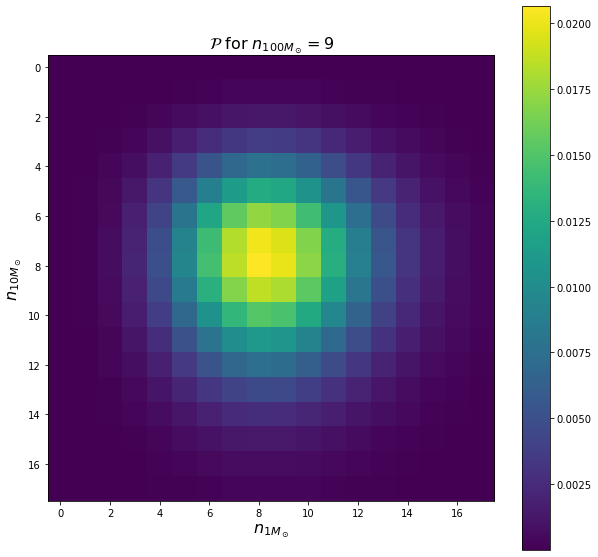

In [11]:
import matplotlib.pyplot as plt

prob = models.ensemble.clumpProbability[0][0,:,:]
comb = models.ensemble.clumpCombinations[0][0,:,:]
i = np.where(comb[:,2]==9)[0]
im = np.zeros((comb[-1,0]+1,comb[-1,1]+1))
for n in range(comb[-1,0]+1):
  for m in range(comb[-1,1]+1):
    j = np.where((comb[i,0]==n)&(comb[i,1]==m))
    im[n,m] = prob[i].prod(1)[j]
# plt.plot(np.arange(i.size), prob[i,:].prod(1))
plt.figure(figsize=(10,10))
# plt.scatter(comb[i,0], comb[i,1], c=prob[i,:].prod(1))
plt.imshow(im)
plt.colorbar()
plt.xlabel(r'$n_{1 M_\odot}$', fontsize=16)
plt.ylabel(r'$n_{10 M_\odot}$', fontsize=16)
plt.title(r'$\mathcal{P}$ for $n_{100 M_\odot}=9$', fontsize=16)
# plt.xlim([-1,18])
# plt.ylim([-1,18])
models.ensemble.clumpCombinations[0][0,-1,:]

As I had mentioned, the probability distribution is strongly peaked for combinations with 9 clumps of 100~M_sol. So the other combinations have probability 0. I have made a couple plots to look at the probability of these combinations.

The most intuitive plot shows a heat map according to the number of the 1~M_sol and 10~M_sol clumps. While the probability is strongly peaked for the number of 100~M_sol clumps, it is not so strongly peaked for the number of the two smaller clumps.

I tried plotting the intensity if I only consider a subset of the possible clump combinations. This saturation feature seems to present no matter which combinations I plot. If I just consider one of the combinations, then the voxel intensity has the typical flat saturation profile as in previous examples. Considering more than one combination seems to produce this strange peak 

Text(0.5, 1.0, '$\\mathcal{P}$ for $n_{100 M_\\odot}=9$')

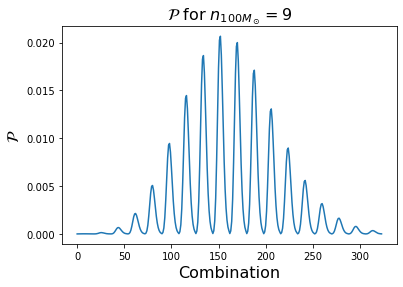

In [10]:
import matplotlib.pyplot as plt

prob = models.ensemble.clumpProbability[0][0,:,:]
comb = models.ensemble.clumpCombinations[0][0,:,:]
i = np.where(comb[:,2]==9)[0]
plt.plot(np.arange(i.size), prob[i,:].prod(1))
plt.xlabel('Combination', fontsize=16)
plt.ylabel(r'$\mathcal{P}$', fontsize=16)
plt.title(r'$\mathcal{P}$ for $n_{100 M_\odot}=9$', fontsize=16)

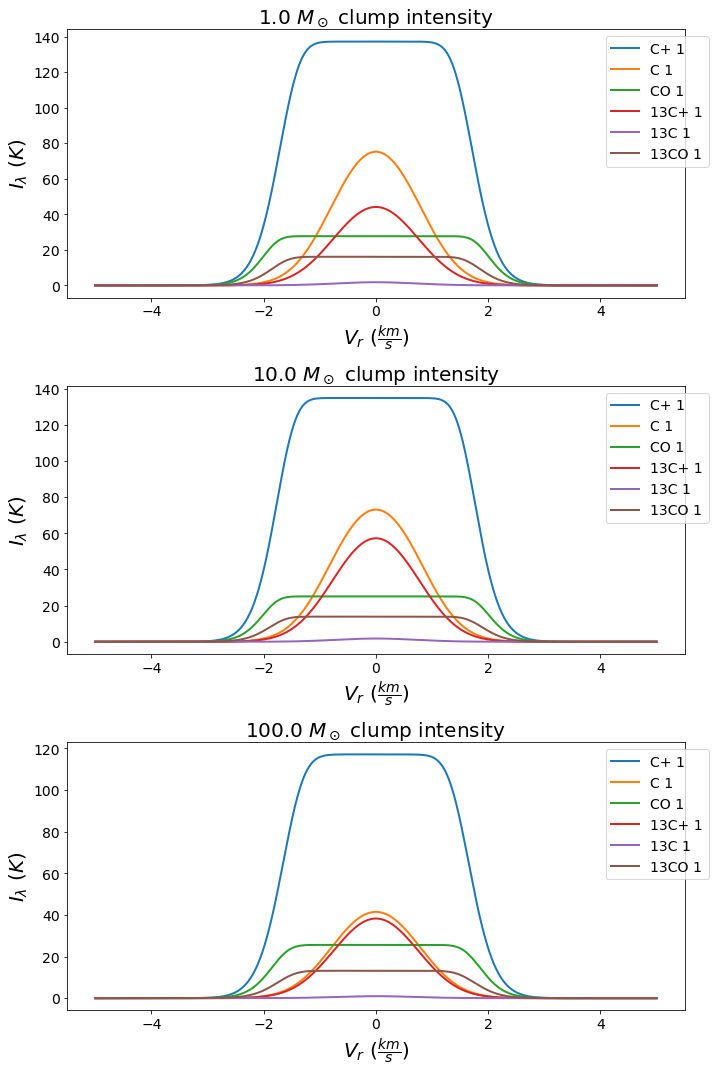

In [28]:
models.masspoints.plotIntensity(molecule=['C+ 1', 'C 1', 'CO 1', '13C+ 1', '13C 1', '13CO 1'], n_cl=[17,17,9], quantity='intensity')

Voxel emission calculated.


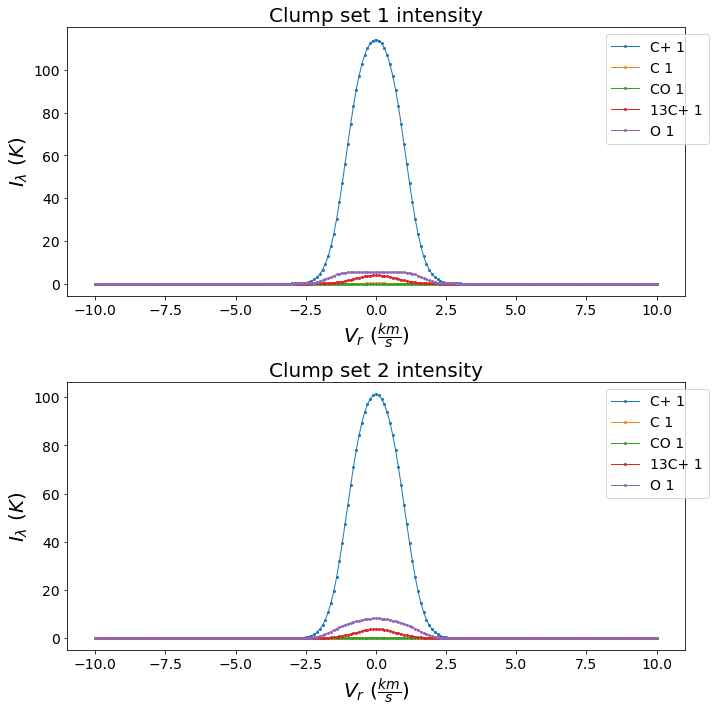

In [9]:
from kosmatau3d import models
import numpy as np

np.set_printoptions(precision=8)

# Use these to change the voxel properties, which is necessary in the default mode.
parameters = { \
                # Model parameters
                'voxel_size' : 1, \
                 'molecules' : 'all', \
                      'dust' : 'PAH', \
            'clumpMassRange' : [[-2], [-2,0]], \
           'clumpMassNumber' : [1, 5], \
                 'clumpNmax' : [1, 1], \
             'velocityRange' : [-10, 10], \
            'velocityNumber' : 201, \

                # Voxel properties
                  'velocity' : 0., \
        'ensembleDispersion' : [0, 0], \
                 'clumpMass' : [100, 100], \
           'ensembleDensity' : [1e4, 1e4], \
                       'FUV' : [1e4, 1e4] \
          }

vox = models.Voxel()
vox.setProperties(**parameters)
vox.calculateEmission(verbose=True)
vox.plotMolecule(molecule=['C+ 1', 'C 1', 'CO 1', '13C+ 1', 'O 1'], quantity='intensity')

In [12]:
['one',
 'two',
 'three',
]

['one', 'two', 'three']

In [3]:
models.ensemble.clumpNj

[array([[10000.]]), []]

In [2]:
models.ensemble.clumpDeltaNji

[array([[ 10.63643619,  21.23149056,  40.00824201,  71.17100363,
         119.52021056, 189.48037992, 283.57750814, 400.64890018,
         534.368397  , 672.82514602, 799.73904694, 897.3854529 ,
         950.5925083 , 950.5925083 , 897.3854529 , 799.73904694,
         672.82514602, 534.368397  , 400.64890018, 283.57750814,
         189.48037992, 119.52021056,  71.17100363,  40.00824201,
          21.23149056,  10.63643619]]), []]

In [57]:
models.ensemble.clumpVelocities

[array([0.]), array([0.])]

In [58]:
~(abs(models.ensemble.clumpVelocities[1]/2) > 4.74)

array([ True])

In [62]:
models.ensemble.clumpDeltaNji[1].T[:,~~(abs(models.ensemble.clumpVelocities[1]/2) > 4.74)]

array([], shape=(5, 0), dtype=float64)

In [42]:
vel = np.array([2,6])
ar = np.random.rand(2,5)*10
i = ~(abs(vel/0.5)>10)
ar[~i] = 0
ar

array([[3.81886361, 8.51211224, 8.20769858, 6.53331022, 4.73623995],
       [0.        , 0.        , 0.        , 0.        , 0.        ]])

In [13]:
models.ensemble.clumpVelocities[1].size

19

In [6]:
', '.join(models.constants.dustNames)

'3.1mm, 2.4mm, 1.8mm, 1.3, 1.0mm, 850um, 700um, 550um, 420um, 300um, 240um, 188.4um, 177.8um, 167.9um, 158.5um, 149.6um, 141.3um, 133.4um, 125.9um, 118.9um, 112.2um, 105.9um, 100.0um, 94.41um, 89.13um, 84.14um, 79.43um, 74.99um, 70.79um, 66.83um, 63.1um, 59.57um, 56.23um, 53.09um, 50.12um, 47.32um, 44.67um, 44.28um, 42.75um, 41.33um, 39.99um, 38.74um, 37.57um, 36.47um, 35.42um, 34.44um, 33.51um, 32.63um, 31.79um, 31.um, 30.24um, 29.52um, 28.83um, 28.18um, 27.55um, 26.95um, 26.38um, 25.83um, 25.3um, 24.8um, 24.31um, 23.84um, 23.39um, 22.96um, 22.54um, 22.14um, 21.75um, 21.38um, 21.01um, 20.66um, 20.32um, 20.um, 19.68um, 19.37um, 19.07um, 18.79um, 18.5, 18.23um, 17.97um, 17.71um, 17.46um, 17.22um, 16.98um, 16.75um, 16.53um, 16.31um, 16.1um, 15.89um, 15.69um, 15.5um, 15.31um, 15.12um, 14.94um, 14.42um, 13.93um, 13.78um, 13.62um, 13.48um, 13.33um, 13.19um, 13.05um, 12.91um, 12.78um, 12.65um, 12.52um, 12.4um, 12.28um, 12.15um, 12.04um, 11.92um, 11.81um, 11.7um, 11.59um, 11.48um, 11.37um, 11

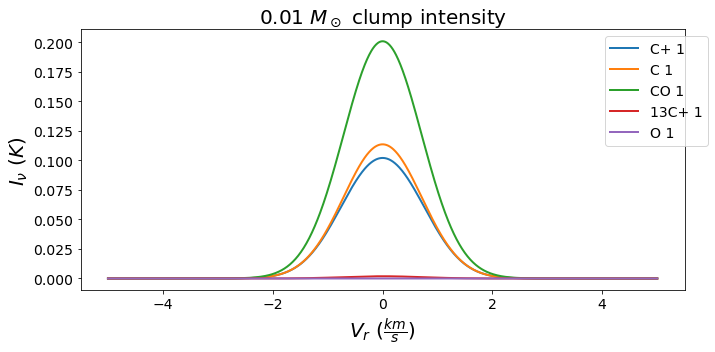

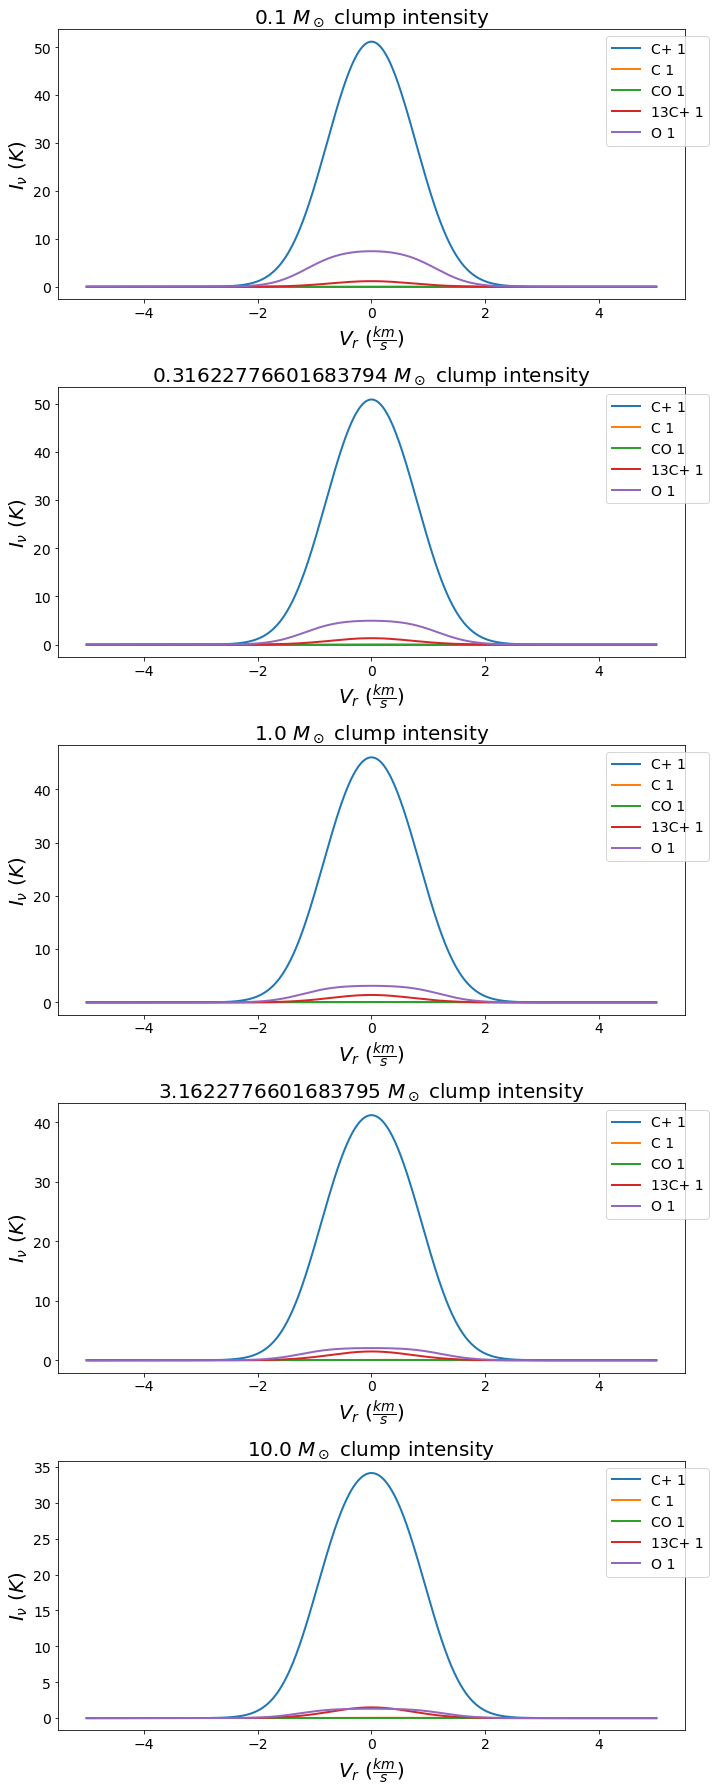

In [3]:
models.masspoints.plotIntensity(molecule=['C+ 1', 'C 1', 'CO 1', '13C+ 1', 'O 1'])

In [5]:
vox.getClumpVelocity()

([array([-3.        , -2.66666667, -2.33333333, -2.        , -1.66666667,
         -1.33333333, -1.        , -0.66666667, -0.33333333,  0.        ,
          0.33333333,  0.66666667,  1.        ,  1.33333333,  1.66666667,
          2.        ,  2.33333333,  2.66666667,  3.        ]), array([0.])],
 [array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]), array([0])])

In [7]:
models.constants.velocityRange

array([-10. ,  -9.9,  -9.8,  -9.7,  -9.6,  -9.5,  -9.4,  -9.3,  -9.2,
        -9.1,  -9. ,  -8.9,  -8.8,  -8.7,  -8.6,  -8.5,  -8.4,  -8.3,
        -8.2,  -8.1,  -8. ,  -7.9,  -7.8,  -7.7,  -7.6,  -7.5,  -7.4,
        -7.3,  -7.2,  -7.1,  -7. ,  -6.9,  -6.8,  -6.7,  -6.6,  -6.5,
        -6.4,  -6.3,  -6.2,  -6.1,  -6. ,  -5.9,  -5.8,  -5.7,  -5.6,
        -5.5,  -5.4,  -5.3,  -5.2,  -5.1,  -5. ,  -4.9,  -4.8,  -4.7,
        -4.6,  -4.5,  -4.4,  -4.3,  -4.2,  -4.1,  -4. ,  -3.9,  -3.8,
        -3.7,  -3.6,  -3.5,  -3.4,  -3.3,  -3.2,  -3.1,  -3. ,  -2.9,
        -2.8,  -2.7,  -2.6,  -2.5,  -2.4,  -2.3,  -2.2,  -2.1,  -2. ,
        -1.9,  -1.8,  -1.7,  -1.6,  -1.5,  -1.4,  -1.3,  -1.2,  -1.1,
        -1. ,  -0.9,  -0.8,  -0.7,  -0.6,  -0.5,  -0.4,  -0.3,  -0.2,
        -0.1,   0. ,   0.1,   0.2,   0.3,   0.4,   0.5,   0.6,   0.7,
         0.8,   0.9,   1. ,   1.1,   1.2,   1.3,   1.4,   1.5,   1.6,
         1.7,   1.8,   1.9,   2. ,   2.1,   2.2,   2.3,   2.4,   2.5,
         2.6,   2.7,

In [6]:
vox.getClumpMass()

[0.0001]

In [7]:
vox.getModelMass()

[9.999999999999964e-05]

In [2]:
models.ensemble.clumpNormalisedNj[0], models.ensemble.clumpNormalisedDeltaNji[0].max()

(array([[6.61431144]]), 1.0)

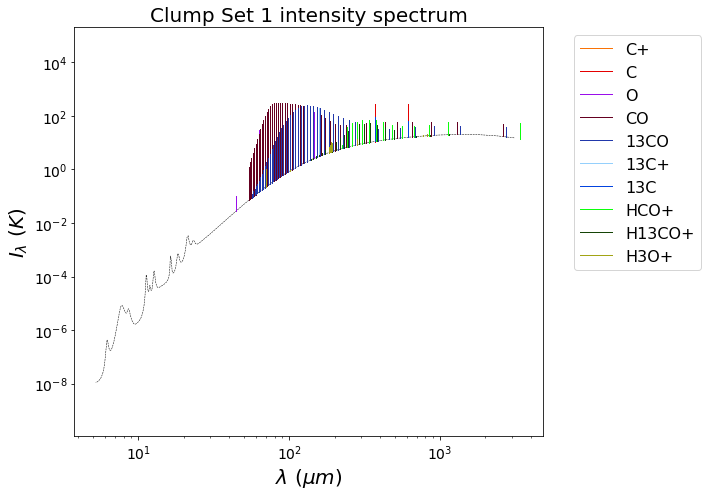

In [131]:
vox.plotSpectrum()

In [42]:
molecules = ['C+ 1', '13C+ 1']

In [26]:
models.masspoints.clumpIntensity[0][:,models.species.speciesIndeces(['C+ 1', '13C+ 1'])]

array([[86.05676646,  3.92075915]])

In [125]:
models.masspoints.clumpOpticalDepth[0][:,models.species.speciesIndeces(['C+ 1', '13C+ 1'])]

array([[0.53109591, 0.00816126]])

In [132]:
i = models.masspoints.clumpIntensity[0][0,models.species.speciesIndeces(molecules)]
t = models.masspoints.clumpOpticalDepth[0][0,models.species.speciesIndeces(molecules)]

i/t*(1-np.exp(-t))

array([64.16091865,  1.64995403])

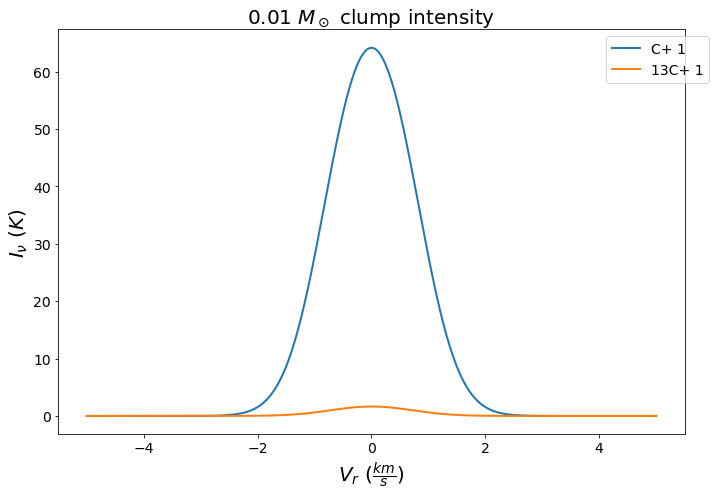

In [126]:
models.masspoints.plotIntensity(molecule=['C+ 1', '13C+ 1'])

In [133]:
e = vox.getEmissivity()[0][:,models.species.speciesIndeces(molecules)].max(0)
a = vox.getAbsorption()[0][:,models.species.speciesIndeces(molecules)].max(0)
ds = models.constants.resolution

e/a*(1-np.exp(-a*ds))

array([155.71536767, 202.74751593])

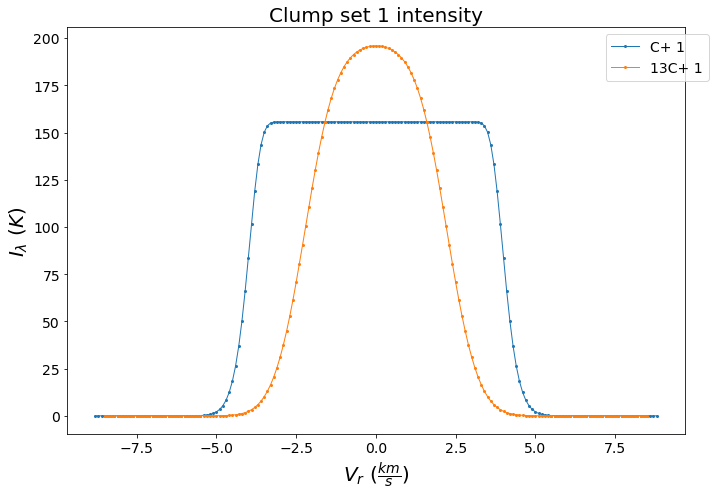

In [136]:
vox.plotMolecule(molecule=['C+ 1', '13C+ 1'])

In [30]:
models.ensemble.printEnsembleParameters()


C L U M P   S E T   1

Nj:
[[0.]]
delta Nji:
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]


C 1 absorption coefficient: 14.801122285670195
C 1 emissivity coefficient: 2061.8081079604717
sigma 1.2224042546994702 -1.222403903395177


/home/craig/miniconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


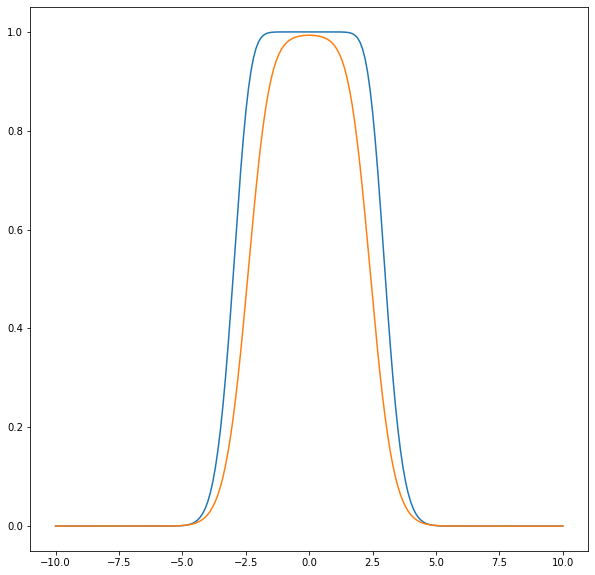

In [37]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def gaus(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

vel = models.constants.velocityRange
cVel = vox.getClumpVelocity()[0]
prob = models.ensemble.clumpProbability[0].prod(2)
eps = vox.getEmissivity()[0]
kap = vox.getAbsorption()[0]
tau = np.array([(prob[i,:].reshape(-1,1)*np.exp(-models.combinations.clumpOpticalDepth[0])) for i in range(prob.shape[0])])
inten = np.array([(prob[i,:].reshape(-1,1)*models.combinations.clumpIntensity[0]) for i in range(prob.shape[0])])
scale = models.constants.resolution
# a = (kap/np.sqrt(2*(kap/scale).astype(np.complex)))
# b = ((kap+kap)/np.sqrt(2*(kap/scale).astype(np.complex)))
# aE = np.array(list(models.radiativeTransfer.Ereal(a)))
# bE = np.array(list(models.radiativeTransfer.Ereal(b)))
intensity = eps/kap * (1-np.exp(-kap*scale))
# intensity_rad = (eps/kap*(1-np.exp(-kap*scale-kap/2.*scale)) - \
#                         (eps*kap/scale-eps*kap/scale)*scale/kap * \
#                         np.sqrt(np.pi/(2.*abs(kap.astype(np.complex)))) * \
#                         (np.exp(a**2.-b**2.)*aE-bE) + \
#                         0*np.exp(-kap*scale-kap/2.*scale)).real
tauc = models.combinations.clumpOpticalDepth[0]

# Choose the species to plot
imol = 202
print('{} absorption coefficient: {}'.format(models.constants.molecules[imol-201],kap[:,imol].max()*scale))
print('{} emissivity coefficient: {}'.format(models.constants.molecules[imol-201],eps[:,imol].max()*scale))

# Perform gaussian fits on the absorption, emissivity, and optical depth
kpopt,kpcov = curve_fit(gaus,vel,kap[:,imol],p0=[1,0,1])
epopt,epcov = curve_fit(gaus,vel,eps[:,imol],p0=[1,0,1])
print('sigma', kpopt[-1], epopt[-1])   #show the line widths of the gaussian fits
kpopt[-1] = epopt[-1]
kpopt[0] = 5e0
# epopt[-1] = kpopt[-1]
cpopt,cpcov = curve_fit(gaus,cVel,-np.log(tau.sum(1))[:,imol],p0=[1,0,1])
intensity_fit = gaus(vel,*epopt)/gaus(vel,*kpopt) * (1-np.exp(-gaus(vel,*kpopt)*scale))

# Plot to find the source of error
plt.figure(figsize=(10,10))
# plt.plot(vel, (eps[:,imol]-gaus(vel,*kpopt))/eps[:,imol])
# plt.plot(vel, eps[:,imol]/kap[:,imol])
plt.plot(vel, (1-np.exp(-kap[:,imol])))
plt.plot(vel, (1-np.exp(-gaus(vel,*kpopt))))
# plt.plot(vel, gaus(vel,*kpopt)/gaus(vel,*kpopt))

# # Plot the voxel intensity and fitted intensity
# plt.figure(figsize=(10,10))
# plt.plot(vel, intensity[:,imol])
# plt.plot(vel, intensity_fit, ls=':', lw=3)
# # plt.plot(vel, intensity_rad[:,imol])

# # Plot emissivity
# plt.figure(figsize=(10,10))
# plt.plot(vel, eps[:,imol])

# # Plot absorption
# plt.figure(figsize=(10,10))
# plt.plot(vel, kap[:,imol])

# # Plot probability
# plt.figure(figsize=(10,10))
# # plt.plot(vel, tauc[:,imol])
# plt.semilogy(np.arange(prob.shape[0]), prob.sum(1))
# print(np.log10(prob.sum(1)).min(), np.log10(prob.sum(1)).max())   #print maximum error in probability
# plt.ylim([1-1e-19,1+1e-19])

# # Plot optical depth
# # plt.plot(cVel, inten.sum(1)[:,imol])
# plt.figure(figsize=(10,10))
# plt.plot(cVel, -np.log(tau.sum(1))[:,imol])
# plt.plot(cVel, gaus(cVel,*cpopt), ls=':', lw=3)

# # Plot number of clumps
# plt.figure(figsize=(10,10))
# plt.scatter(vel, models.ensemble.clumpNormalisedDeltaNji[0])

In [3]:
# Define how many clump are in a line-of-sight
nClumps = 661
# Get the clump radius
rcl = models.masspoints.clumpRadius[0][0,0]
# Specify transitions
molecules = ['dust 3.1mm', 'C+ 1', 'C 1', 'C 2', 'O 1', 'O 2', 'CO 1', 'CO 25', '13C 1']
# get the clump intensity and optical depth for the required transitions
icl = models.masspoints.clumpIntensity[0][0,models.species.speciesIndeces(molecules)]
tcl = models.masspoints.clumpOpticalDepth[0][0,models.species.speciesIndeces(molecules)]

print('Clump intensities:')
for i,I in enumerate(icl/tcl*(1-np.exp(-tcl))):
  print('{:>10}: {:.6} K'.format(molecules[i], I))
print('\n')

# Initialise the line intensities
I = np.zeros(icl.size)

# Integrate over the number of clumps along a line-of-sight
for i in range(nClumps):
  I = np.exp(-tcl) * ( icl/tcl*(np.exp(tcl)-1) + I )
  
# Integrate in an alternate simplified equation
# I = icl/tcl * (1-np.exp(-nClumps*tcl))

for i,transition in enumerate(molecules):
  print('The brightness temperature of the {:10} transition is {:.6} K'.format(transition, I[i]))

Clump intensities:
dust 3.1mm: 0.0331402 K
      C+ 1: 85.8156 K
       C 1: 5.31062 K
       C 2: 8.25942 K
       O 1: 25.7146 K
       O 2: 78.5478 K
      CO 1: 23.6706 K
     CO 25: 0.461723 K
     13C 1: 0.100765 K


The brightness temperature of the dust 3.1mm transition is 13.7427 K
The brightness temperature of the C+ 1       transition is 122.287 K
The brightness temperature of the C 1        transition is 139.301 K
The brightness temperature of the C 2        transition is 159.364 K
The brightness temperature of the O 1        transition is 25.7304 K
The brightness temperature of the O 2        transition is 99.7887 K
The brightness temperature of the CO 1       transition is 25.6907 K
The brightness temperature of the CO 25      transition is 174.354 K
The brightness temperature of the 13C 1      transition is 50.5011 K


In [5]:
models.species.speciesIndeces(molecules)

[array([0]), 201, 202, 203, 205, 206, 208, 232, 307]

In [7]:
'dust 3.1mm'.split()

['dust', '3.1mm']

In [3]:
models.constants.dustNames

array(['3.1mm', '2.4mm', '1.8mm', '1.3', '1.0mm', '850um', '700um',
       '550um', '420um', '300um', '240um', '188.4um', '177.8um',
       '167.9um', '158.5um', '149.6um', '141.3um', '133.4um', '125.9um',
       '118.9um', '112.2um', '105.9um', '100.0um', '94.41um', '89.13um',
       '84.14um', '79.43um', '74.99um', '70.79um', '66.83um', '63.1um',
       '59.57um', '56.23um', '53.09um', '50.12um', '47.32um', '44.67um',
       '44.28um', '42.75um', '41.33um', '39.99um', '38.74um', '37.57um',
       '36.47um', '35.42um', '34.44um', '33.51um', '32.63um', '31.79um',
       '31.um', '30.24um', '29.52um', '28.83um', '28.18um', '27.55um',
       '26.95um', '26.38um', '25.83um', '25.3um', '24.8um', '24.31um',
       '23.84um', '23.39um', '22.96um', '22.54um', '22.14um', '21.75um',
       '21.38um', '21.01um', '20.66um', '20.32um', '20.um', '19.68um',
       '19.37um', '19.07um', '18.79um', '18.5', '18.23um', '17.97um',
       '17.71um', '17.46um', '17.22um', '16.98um', '16.75um', '16.53um',
 